In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import locale
import regex as re
import math
import textwrap

Gráfico de línea de muertes por traumatismos y por respiratorias, de 2016 a 2020

Heat map mes y año

Correlación ruralidad y tasa de mortalidad

Correlación ruralidad y tasa de mortalidad, por región

Connected dot plot, ordenado por ruralidad 

Cloropletico RM 


In [ ]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_com = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

In [ ]:
defunciones_com['GLOSA_CAPITULO_DIAG1'].value_counts()

In [2]:
cols_def=["ANO_DEF","FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA",
          "GLOSA_COMUNA_RESIDENCIA","GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1",
          "CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1",
          "CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2","CAPITULO_DIAG2",
          "GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
          "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"]
defunciones_com = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_com = defunciones_com[(defunciones_com['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_com = defunciones_com[defunciones_com.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_com.loc[defunciones_com.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_com = defunciones_com[['CODIGO_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_COMUNA_RESIDENCIA','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_com = (defunciones_com.groupby(by=['CODIGO_COMUNA_RESIDENCIA','GLOSA_COMUNA_RESIDENCIA','ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'CODIGO_COMUNA_RESIDENCIA':'Comuna',
                                  'GLOSA_COMUNA_RESIDENCIA' : 'Glosa Comuna',
                                  'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_com = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com = (proy_pob_com[['Comuna','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_com = (pd.melt(proy_pob_com,id_vars='Comuna',
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['Comuna','anio'])
           .sum()
           .reset_index())

proy_pob_com_rur = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_com_rur = (proy_pob_com_rur[['Comuna','Area (1=Urbano 2=Rural)','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021',
                              'Area (1=Urbano 2=Rural)':'area'
               
           }))
proy_pob_com_rur = (pd.melt(proy_pob_com_rur,id_vars=['Comuna','area'],
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob_rur'
           })
           .groupby(['Comuna','anio','area'])
           .sum()
           .reset_index())
proy_pob_com_rur = proy_pob_com_rur[proy_pob_com_rur['area']==2]

proy_pob_com['anio'] = proy_pob_com['anio'].astype('int64')
proy_pob_com_rur['anio'] = proy_pob_com_rur['anio'].astype('int64')

tasa_def_com = (defunciones_com.merge(proy_pob_com,how='left',on=['Comuna','anio'])
.merge(proy_pob_com_rur[['Comuna','anio','pob_rur']],how='left',on=['Comuna','anio']))
tasa_def_com['tasa_def_com'] = tasa_def_com['n_def']/tasa_def_com['pob']*100000
tasa_def_com['tasa_rur'] = tasa_def_com['pob_rur']/tasa_def_com['pob']*100
tasa_def_com['region'] = np.where(tasa_def_com['Comuna']>=10000, tasa_def_com['Comuna'].astype(str).str[0:2], tasa_def_com['Comuna'].astype(str).str[0])
tasa_def_com['region'] = tasa_def_com['region'].astype('int64')

In [3]:
defunciones_nac = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_nac = defunciones_nac[(defunciones_nac['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_nac = defunciones_nac[defunciones_nac.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_nac.loc[defunciones_nac.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_nac = defunciones_nac[['ANO_DEF','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_nac = (defunciones_nac.groupby(by=['ANO_DEF','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))

proy_pob_nac = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_nac = (proy_pob_nac[['Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_nac = (pd.melt(proy_pob_nac,
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['anio'])
           .sum()
           .reset_index())
proy_pob_nac['anio'] = proy_pob_nac['anio'].astype('int64')

tasa_def_nac = (defunciones_nac.merge(proy_pob_nac,how='left',on=['anio']))
tasa_def_nac['tasa_def_nac'] = tasa_def_nac['n_def']/tasa_def_nac['pob']*100000


In [4]:
defunciones_edad = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)

defunciones_edad = defunciones_edad[(defunciones_edad['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_edad = defunciones_edad[defunciones_edad.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_edad.loc[defunciones_edad.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_edad['edad'] = np.where(defunciones_edad['EDAD_TIPO']==1,defunciones_edad['EDAD_CANT'],
                                   np.where(defunciones_edad['EDAD_TIPO']==2,round(defunciones_edad['EDAD_CANT']/12),
                                           np.where(defunciones_edad['EDAD_TIPO']==3,round(defunciones_edad['EDAD_CANT']/365),
                                                   np.where(defunciones_edad['EDAD_TIPO']==4,round(defunciones_edad['EDAD_CANT']/8760),None))))
defunciones_edad['rango_edad'] = np.where((defunciones_edad['edad']>=0) & (defunciones_edad['edad']<=9), '0 a 9 años',
                                         np.where((defunciones_edad['edad']>=10) & (defunciones_edad['edad']<=19), '10 a 19 años',
                                                 np.where((defunciones_edad['edad']>=20) & (defunciones_edad['edad']<=39), '20 a 39 años',
                                                         np.where((defunciones_edad['edad']>=40) & (defunciones_edad['edad']<=59), '40 a 59 años',
                                                                 np.where((defunciones_edad['edad']>=60) & (defunciones_edad['edad']<=79), '60 a 79 años',
                                                                         np.where((defunciones_edad['edad']>=80), '80 años o más',None))))))
defunciones_edad = defunciones_edad[['ANO_DEF','rango_edad','GLOSA_CAPITULO_DIAG1','FECHA_DEF']].dropna()
defunciones_edad = (defunciones_edad.groupby(by=['ANO_DEF','rango_edad','GLOSA_CAPITULO_DIAG1'])
               .count()
               .reset_index()
               .rename(columns = {'GLOSA_CAPITULO_DIAG1':'causa',
                                  'ANO_DEF':'anio',
                                  'FECHA_DEF':'n_def'}))
proy_pob_edad = pd.read_excel("estimaciones-y-proyecciones-2002-2035-comuna-y-área-urbana-y-rural.xlsx",
                        sheet_name="EEPP comuna área")
proy_pob_edad = (proy_pob_edad[['Grupo edad','Poblacion 2016','Poblacion 2017','Poblacion 2018','Poblacion 2019',
                     'Poblacion 2020','Poblacion 2021']]
           .rename(columns = {'Poblacion 2016':'2016',
                              'Poblacion 2017':'2017',
                              'Poblacion 2018':'2018',
                              'Poblacion 2019':'2019',
                              'Poblacion 2020':'2020',
                              'Poblacion 2021':'2021'
               
           }))
proy_pob_edad['rango_edad'] = np.where((proy_pob_edad['Grupo edad']=='0 Año') | (proy_pob_edad['Grupo edad']=='De 1 a 4 años')|(proy_pob_edad['Grupo edad']=='De 5 a 9 años'),'0 a 9 años',
                                      np.where((proy_pob_edad['Grupo edad']=='De 10 a 14 años') | (proy_pob_edad['Grupo edad']=='De 15 a 19 años'),'10 a 19 años',
                                              np.where((proy_pob_edad['Grupo edad']=='De 20 a 24 años') | (proy_pob_edad['Grupo edad']=='De 25 a 29 años')|(proy_pob_edad['Grupo edad']=='De 30 a 34 años')|(proy_pob_edad['Grupo edad']=='De 35 a 39 años'),'20 a 39 años',
                                                      np.where((proy_pob_edad['Grupo edad']=='De 40 a 44 años') | (proy_pob_edad['Grupo edad']=='De 45 a 49 años')|(proy_pob_edad['Grupo edad']=='De 50 a 54 años')|(proy_pob_edad['Grupo edad']=='De 55 a 59 años'),'40 a 59 años',
                                                              np.where((proy_pob_edad['Grupo edad']=='De 60 a 64 años') | (proy_pob_edad['Grupo edad']=='De 65 a 69 años')|(proy_pob_edad['Grupo edad']=='De 70 a 74 años')|(proy_pob_edad['Grupo edad']=='De 75 a 79 años'),'60 a 79 años','80 años o más')))))
proy_pob_edad = proy_pob_edad[['rango_edad','2016','2017','2018','2019','2020','2021']]
proy_pob_edad = (pd.melt(proy_pob_edad,id_vars='rango_edad',
                   value_vars=['2016','2017','2018','2019','2020','2021'])
           .rename(columns = {
               'variable':'anio',
               'value':'pob'
           })
           .groupby(['rango_edad','anio'])
           .sum()
           .reset_index())
proy_pob_edad['anio'] = proy_pob_edad['anio'].astype('int64')
tasa_def_edad = (defunciones_edad.merge(proy_pob_edad,how='left',on=['rango_edad','anio']))
tasa_def_edad['tasa_def_edad'] = tasa_def_edad['n_def']/tasa_def_edad['pob']*100000

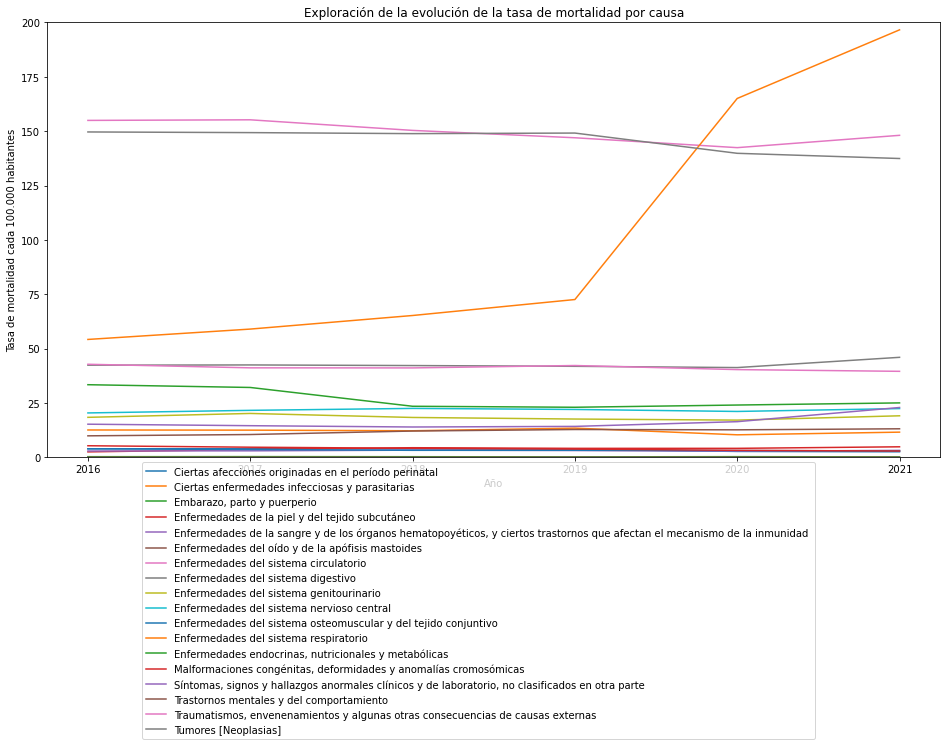

In [5]:
tab1 = tasa_def_nac.pivot_table(values="tasa_def_nac",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab1.index:
    tab1.loc[year].plot.line(ax=ax)

plt.title("Exploración de la evolución de la tasa de mortalidad por causa") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend(loc='upper left',bbox_to_anchor=(0.1, 0., 0.5, 0))
plt.ylim(0, 200)

plt.show()

In [85]:
defunciones_mes = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2016_2022_15092022.csv", 
                          encoding='latin-1',
                          sep=";",
                         header=None,
                         names=cols_def)
defunciones_mes = defunciones_mes[(defunciones_mes['CODIGO_COMUNA_RESIDENCIA']!=99999)]
defunciones_mes = defunciones_mes[defunciones_mes.ANO_DEF.isin([2016,2017,2018,2019,2020,2021])]
defunciones_mes.loc[defunciones_mes.GLOSA_CAPITULO_DIAG1 == 'Códigos para propósitos especiales', 'GLOSA_CAPITULO_DIAG1'] = 'Enfermedades del sistema respiratorio '
defunciones_mes['fecha'] = pd.to_datetime(defunciones_mes['FECHA_DEF'], format='%Y-%m-%d')
defunciones_mes['mes'] = defunciones_mes['fecha'].dt.strftime('%m')
defunciones_mes['region'] = np.where(defunciones_mes['CODIGO_COMUNA_RESIDENCIA']>=10000, defunciones_mes['CODIGO_COMUNA_RESIDENCIA'].astype(str).str[0:2], defunciones_mes['CODIGO_COMUNA_RESIDENCIA'].astype(str).str[0])
defunciones_mes['region'] = defunciones_mes['region'].astype('int64')
defunciones_mes_causa = defunciones_mes[['ANO_DEF','mes','GLOSA_CAPITULO_DIAG1','FECHA_DEF']]
defunciones_mes_causa = defunciones_mes_causa[defunciones_mes_causa['GLOSA_CAPITULO_DIAG1']!='Enfermedades del ojo y sus anexos']
defunciones_mes_causa = defunciones_mes_causa[defunciones_mes_causa['GLOSA_CAPITULO_DIAG1']!='Embarazo, parto y puerperio']
defunciones_mes_causa = (defunciones_mes_causa.groupby(by=['ANO_DEF','mes','GLOSA_CAPITULO_DIAG1']).
                         count().
                         reset_index()
                        .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_causa['tasa_def'] = defunciones_mes_causa['FECHA_DEF']/defunciones_mes_causa['pob']*100000
defunciones_mes_causa = (defunciones_mes_causa.pivot_table(values='tasa_def',index=["mes",'GLOSA_CAPITULO_DIAG1'], columns = "ANO_DEF",aggfunc=sum).dropna())
defunciones_mes_causa = defunciones_mes_causa.reset_index()
meses = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

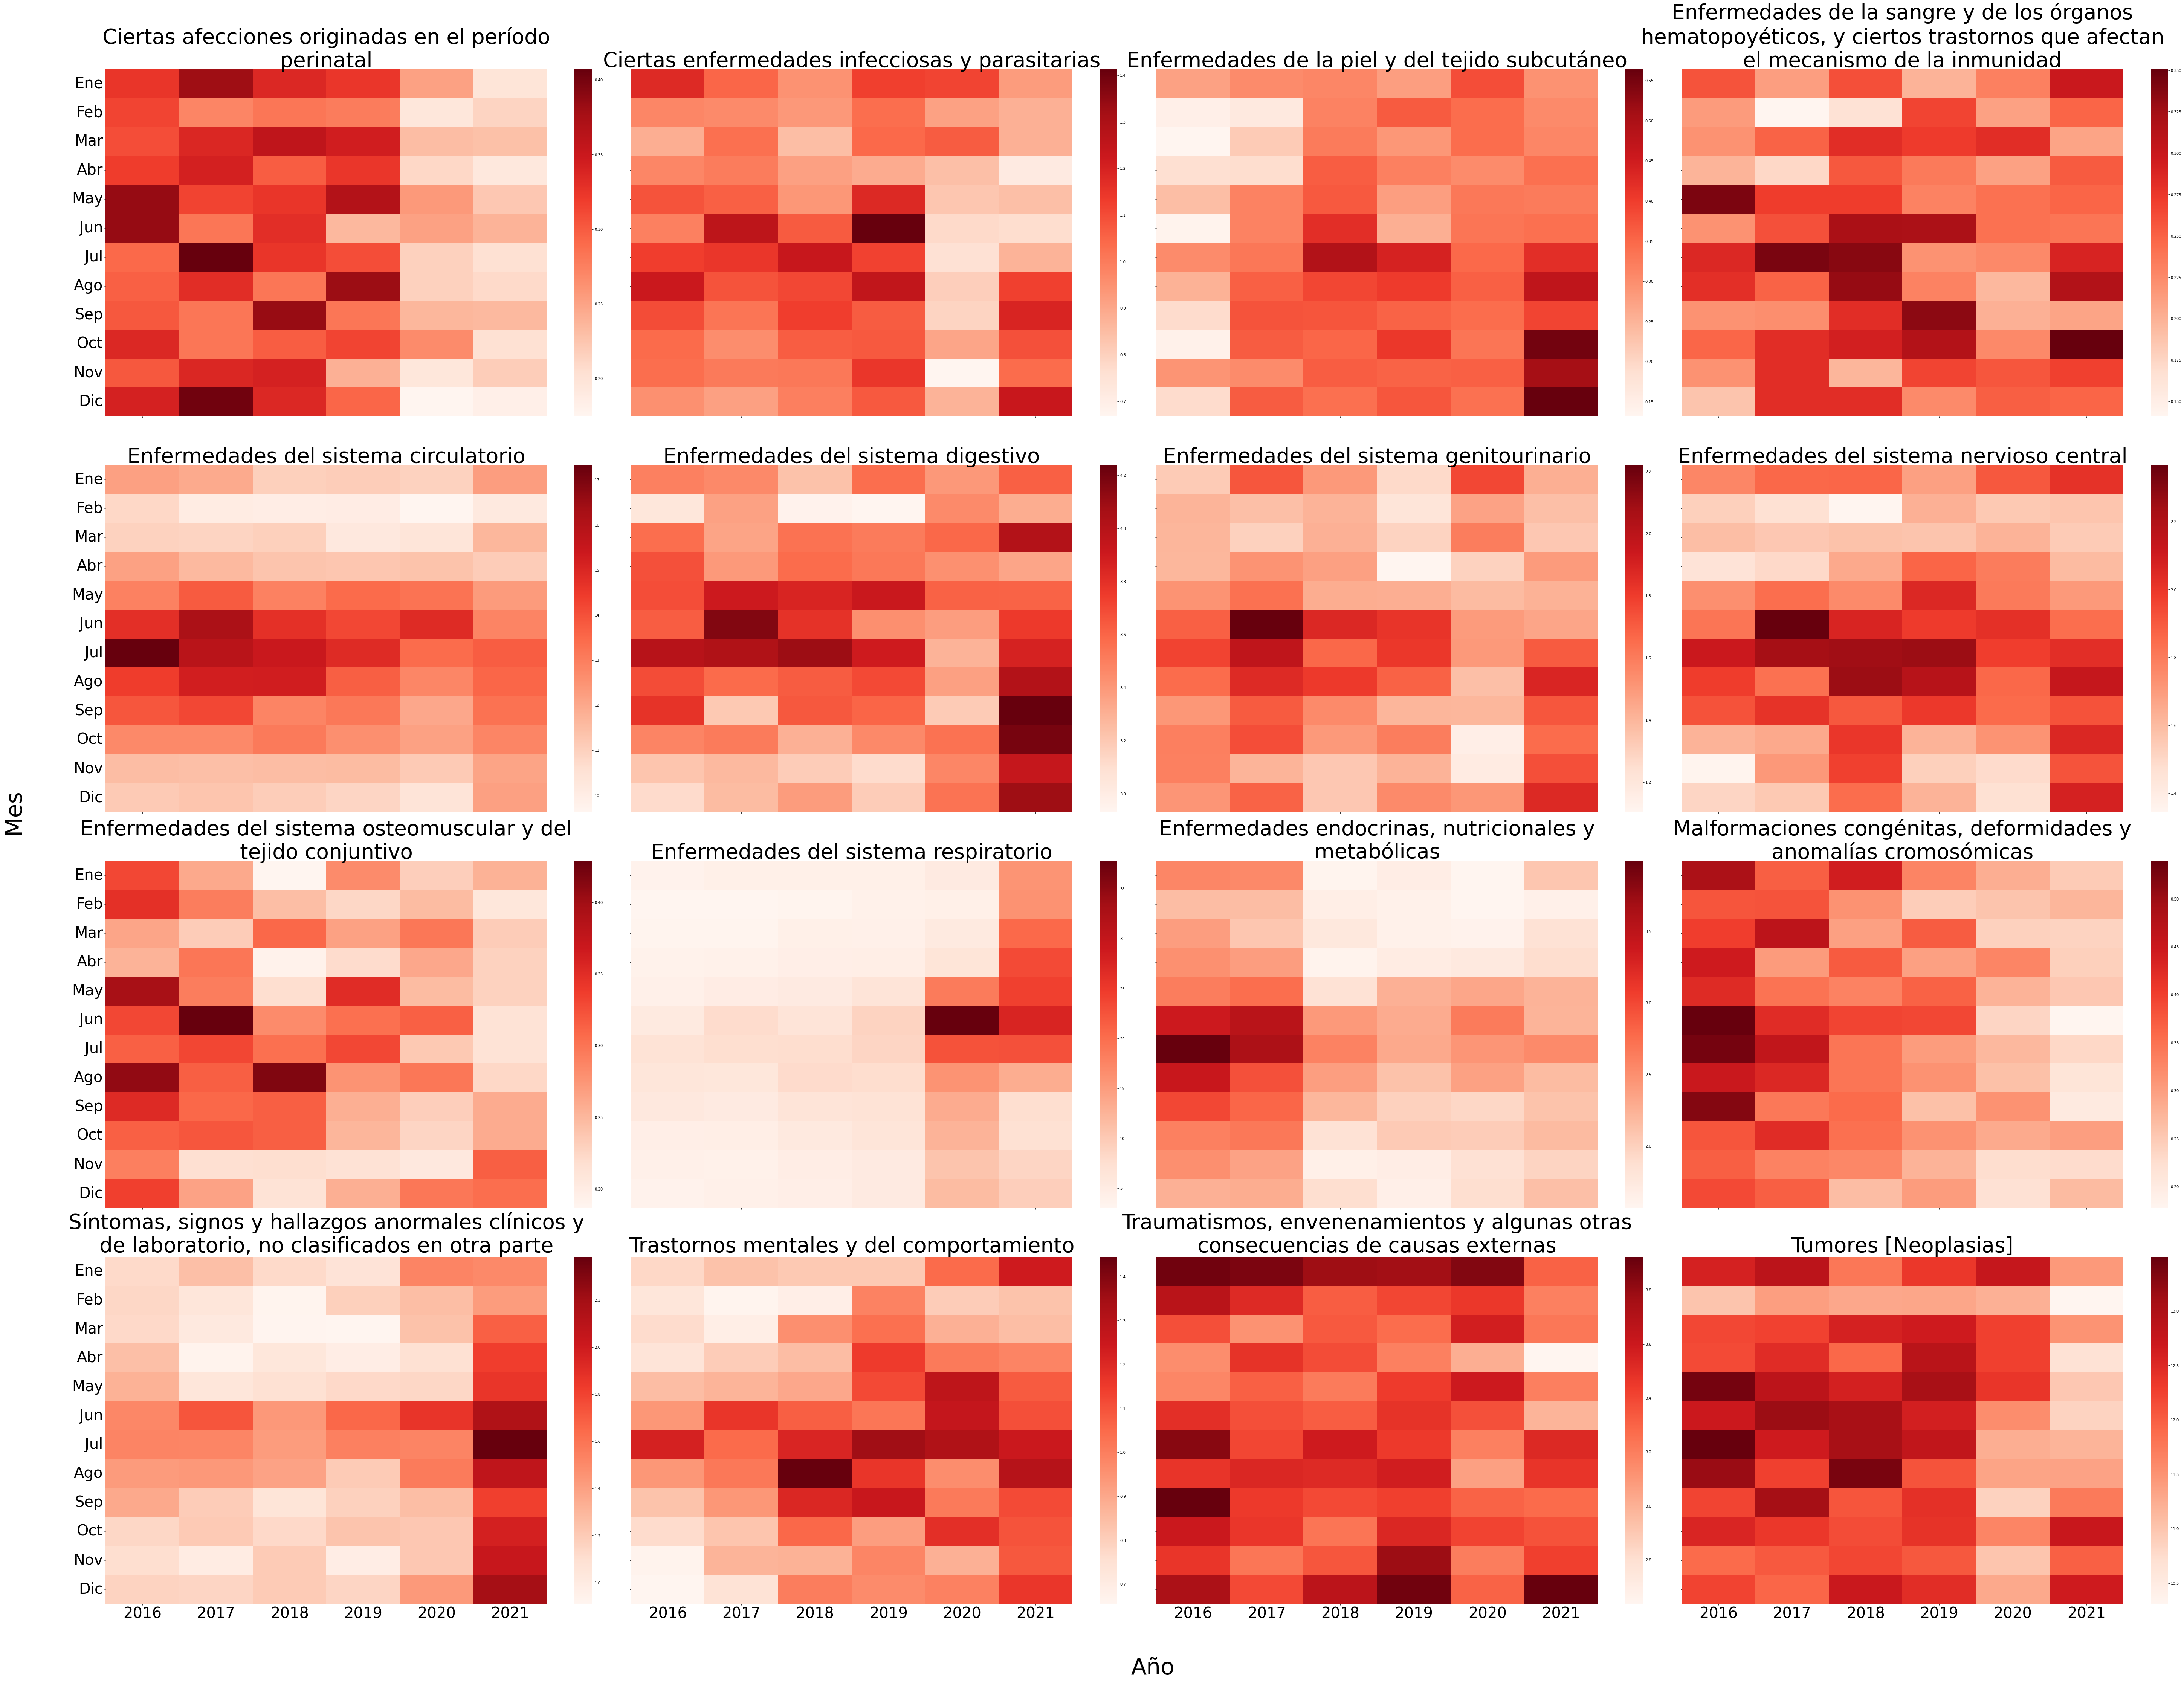

In [86]:
causas = defunciones_mes_causa['GLOSA_CAPITULO_DIAG1'].unique()
ncausas = len(causas)
cols = 4
rows = int(ncausas/cols)
def plot_causa(causa, ax, df):
    data = (
        df[df['GLOSA_CAPITULO_DIAG1'] == causa]
            .drop(['GLOSA_CAPITULO_DIAG1'], axis=1)
            .set_index('mes')
        )
    sns.heatmap(data, ax=ax, cmap='Reds', yticklabels=meses)
    ax.set_title('\n'.join(textwrap.wrap(causa,50)) ,fontsize=55)
    ax.set_xlabel('',fontsize=1)
    ax.set_ylabel('',fontsize=1)
    ax.tick_params(labelsize=40,labelrotation=0)
fig, ax = plt.subplots(rows, cols, figsize=(80,60),sharey=True,sharex=True)

for idx_causa, causa in enumerate(causas):
    row = int(idx_causa / cols)
    col = idx_causa % cols
    plot_causa(causa, ax[row][col],defunciones_mes_causa)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60)
fig.tight_layout()

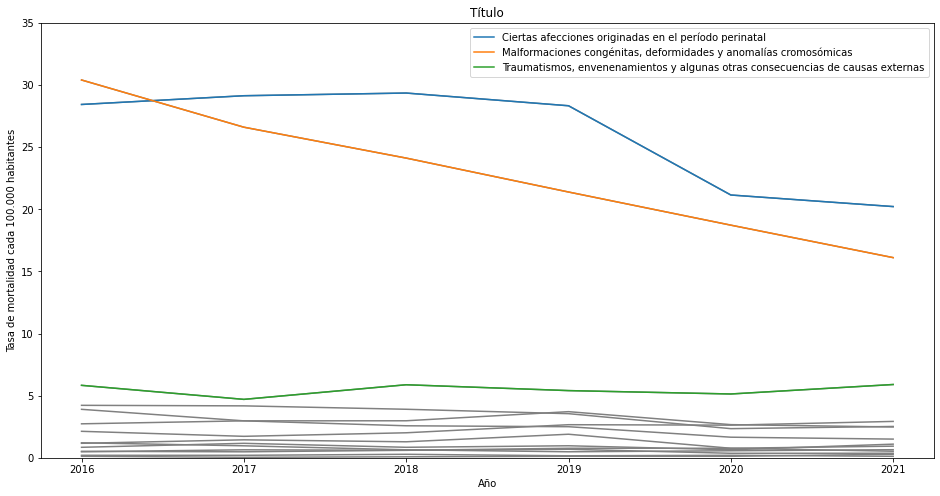

In [87]:
tasa_def_edad_0 = tasa_def_edad[tasa_def_edad['rango_edad'] == '0 a 9 años']
tab2 = tasa_def_edad_0.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab2.index:
    tab2.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab2.loc['Ciertas afecciones originadas en el período perinatal'], label='Ciertas afecciones originadas en el período perinatal')
plt.plot(tab2.loc['Malformaciones congénitas, deformidades y anomalías cromosómicas'], label='Malformaciones congénitas, deformidades y anomalías cromosómicas')
plt.plot(tab2.loc['Traumatismos, envenenamientos y algunas otras consecuencias de causas externas'], label='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 35)

plt.show()

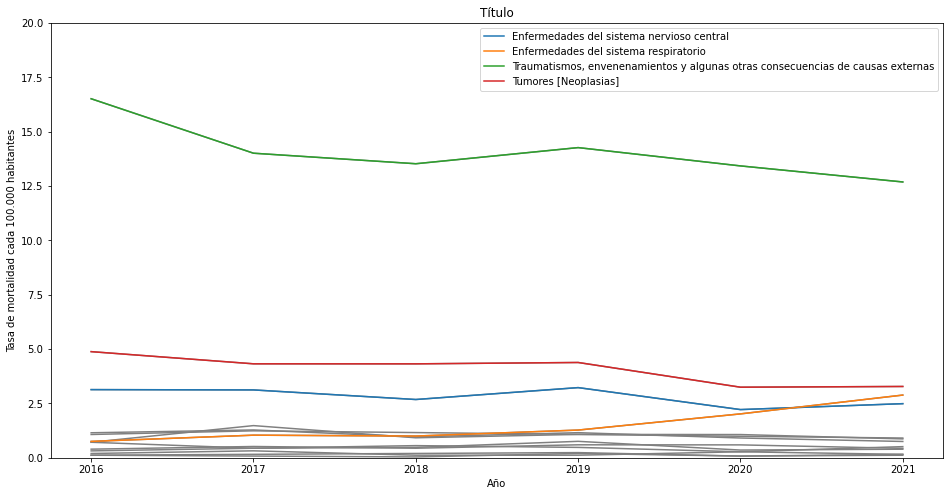

In [88]:
tasa_def_edad_10 = tasa_def_edad[tasa_def_edad['rango_edad'] == '10 a 19 años']
tab3 = tasa_def_edad_10.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab3.index:
    tab3.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab3.loc['Enfermedades del sistema nervioso central'], label='Enfermedades del sistema nervioso central')
plt.plot(tab3.loc['Enfermedades del sistema respiratorio '], label='Enfermedades del sistema respiratorio ')
plt.plot(tab3.loc['Traumatismos, envenenamientos y algunas otras consecuencias de causas externas'], label='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')
plt.plot(tab3.loc['Tumores [Neoplasias]'], label='Tumores [Neoplasias]')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 20)

plt.show()

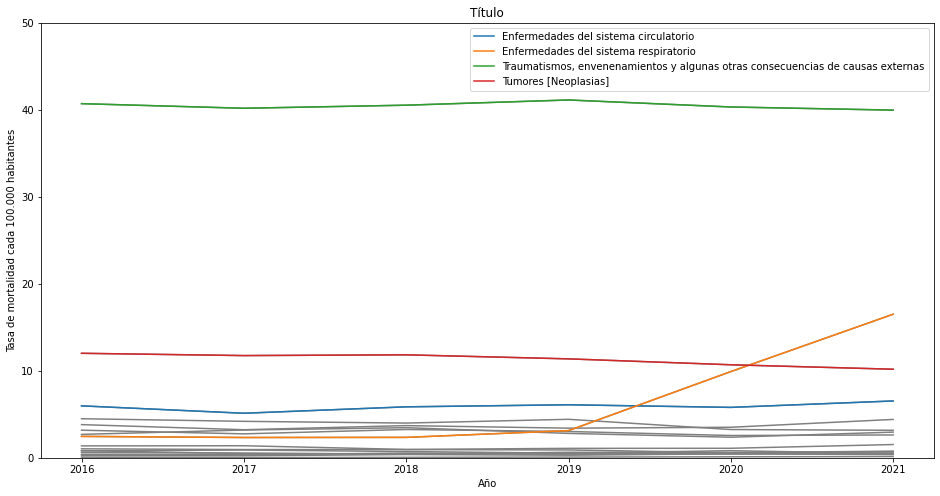

In [20]:
tasa_def_edad_20 = tasa_def_edad[tasa_def_edad['rango_edad'] == '20 a 39 años']
tab4 = tasa_def_edad_20.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab4.index:
    tab4.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab4.loc['Enfermedades del sistema circulatorio '], label='Enfermedades del sistema circulatorio ')
plt.plot(tab4.loc['Enfermedades del sistema respiratorio '], label='Enfermedades del sistema respiratorio ')
plt.plot(tab4.loc['Traumatismos, envenenamientos y algunas otras consecuencias de causas externas'], label='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')
plt.plot(tab4.loc['Tumores [Neoplasias]'], label='Tumores [Neoplasias]')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 50)

plt.show()

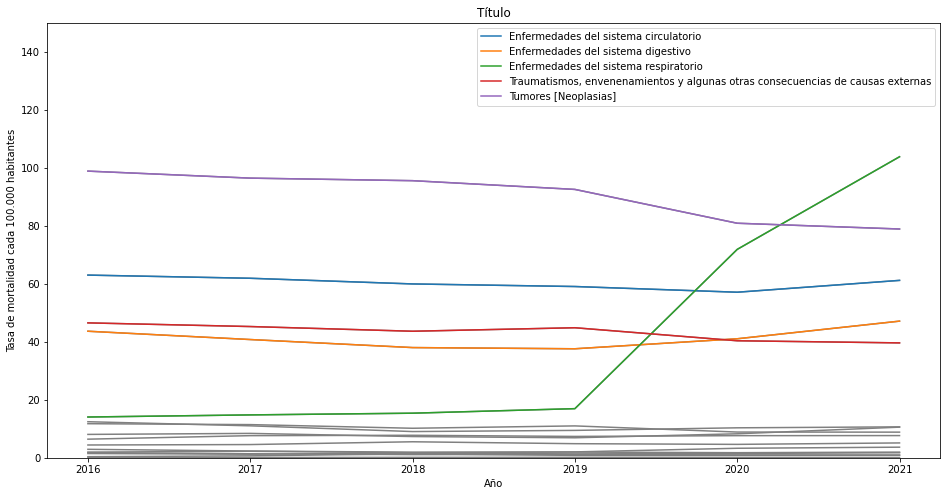

In [21]:
tasa_def_edad_40 = tasa_def_edad[tasa_def_edad['rango_edad'] == '40 a 59 años']
tab5 = tasa_def_edad_40.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab5.index:
    tab5.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab5.loc['Enfermedades del sistema circulatorio '], label='Enfermedades del sistema circulatorio ')
plt.plot(tab5.loc['Enfermedades del sistema digestivo'], label='Enfermedades del sistema digestivo')
plt.plot(tab5.loc['Enfermedades del sistema respiratorio '], label='Enfermedades del sistema respiratorio ')
plt.plot(tab5.loc['Traumatismos, envenenamientos y algunas otras consecuencias de causas externas'], label='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas')
plt.plot(tab5.loc['Tumores [Neoplasias]'], label='Tumores [Neoplasias]')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 150)

plt.show()

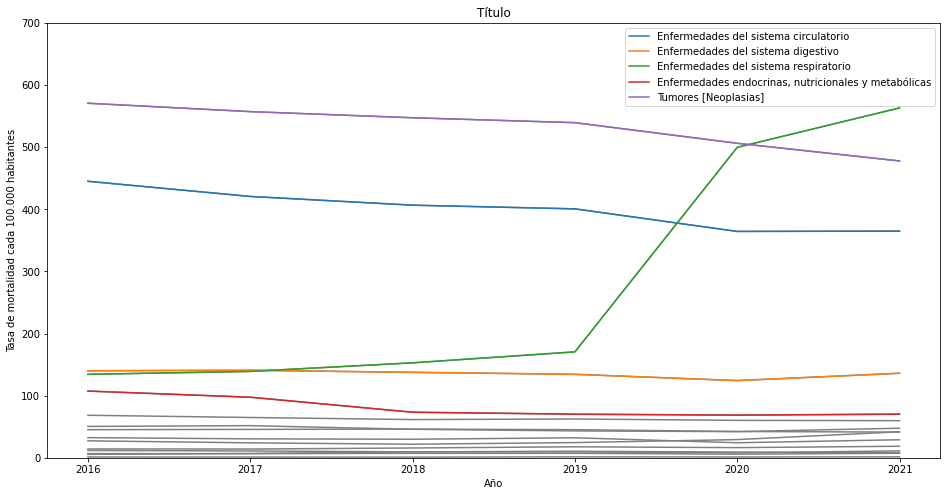

In [22]:
tasa_def_edad_60 = tasa_def_edad[tasa_def_edad['rango_edad'] == '60 a 79 años']
tab6 = tasa_def_edad_60.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab6.index:
    tab6.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab6.loc['Enfermedades del sistema circulatorio '], label='Enfermedades del sistema circulatorio ')
plt.plot(tab6.loc['Enfermedades del sistema digestivo'], label='Enfermedades del sistema digestivo')
plt.plot(tab6.loc['Enfermedades del sistema respiratorio '], label='Enfermedades del sistema respiratorio ')
plt.plot(tab6.loc['Enfermedades endocrinas, nutricionales y metabólicas'], label='Enfermedades endocrinas, nutricionales y metabólicas')
plt.plot(tab6.loc['Tumores [Neoplasias]'], label='Tumores [Neoplasias]')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 700)

plt.show()

In [ ]:
tab6

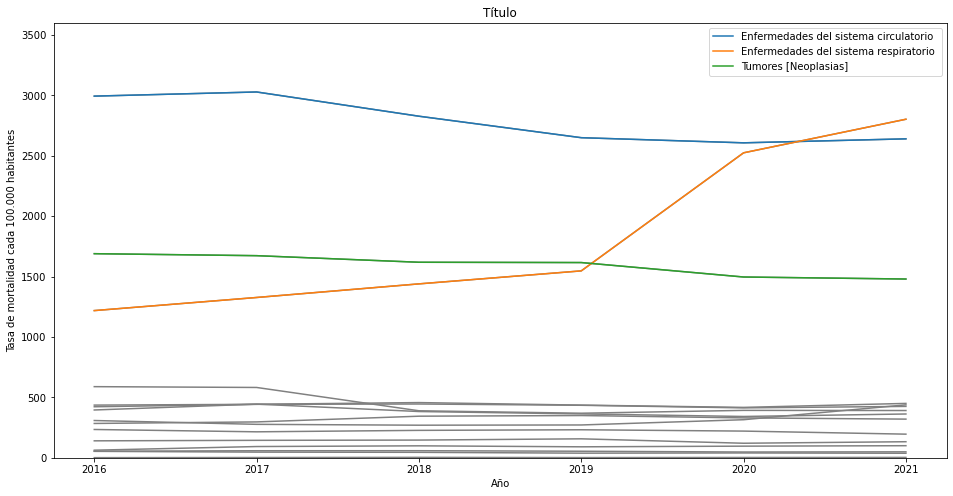

In [23]:
tasa_def_edad_80 = tasa_def_edad[tasa_def_edad['rango_edad'] == '80 años o más']
tab7 = tasa_def_edad_80.pivot_table(values="tasa_def_edad",index=["causa"],columns = "anio",aggfunc=sum).dropna()
fig, ax = plt.subplots(1,1, figsize=(16,8))

for year in tab7.index:
    tab7.loc[year].plot.line(ax=ax,label='_Hiden',color='gray')

plt.plot(tab7.loc['Enfermedades del sistema circulatorio '], label='Enfermedades del sistema circulatorio ')
plt.plot(tab7.loc['Enfermedades del sistema respiratorio '], label='Enfermedades del sistema respiratorio ')
plt.plot(tab7.loc['Tumores [Neoplasias]'], label='Tumores [Neoplasias]')
plt.title("Título") 
plt.xlabel("Año")
plt.ylabel("Tasa de mortalidad cada 100.000 habitantes")
plt.legend()
plt.ylim(0, 3600)

plt.show()

In [66]:
defunciones_mes_res_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema respiratorio ']
defunciones_mes_res_reg = defunciones_mes_res_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_res_reg = (defunciones_mes_res_reg.groupby(by=['ANO_DEF','mes','region'])
                           .count()
                           .reset_index()
                          .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_res_reg['tasa_def'] = defunciones_mes_res_reg['FECHA_DEF']/defunciones_mes_res_reg['pob']*100000
defunciones_mes_res_reg = (defunciones_mes_res_reg
                           .pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum)
                           .dropna())
defunciones_mes_res_reg = defunciones_mes_res_reg.reset_index()

In [70]:
label_region ='Tarapacá','Antofagasta','Atacama','Coquimbo','Valparaíso',"O'Higgins",'Maule','Biobío','La Araucanía','Los Lagos','Aysén','Magallanes','Metropolitana','Los Ríos','Arica y Parinacota','Ñuble'

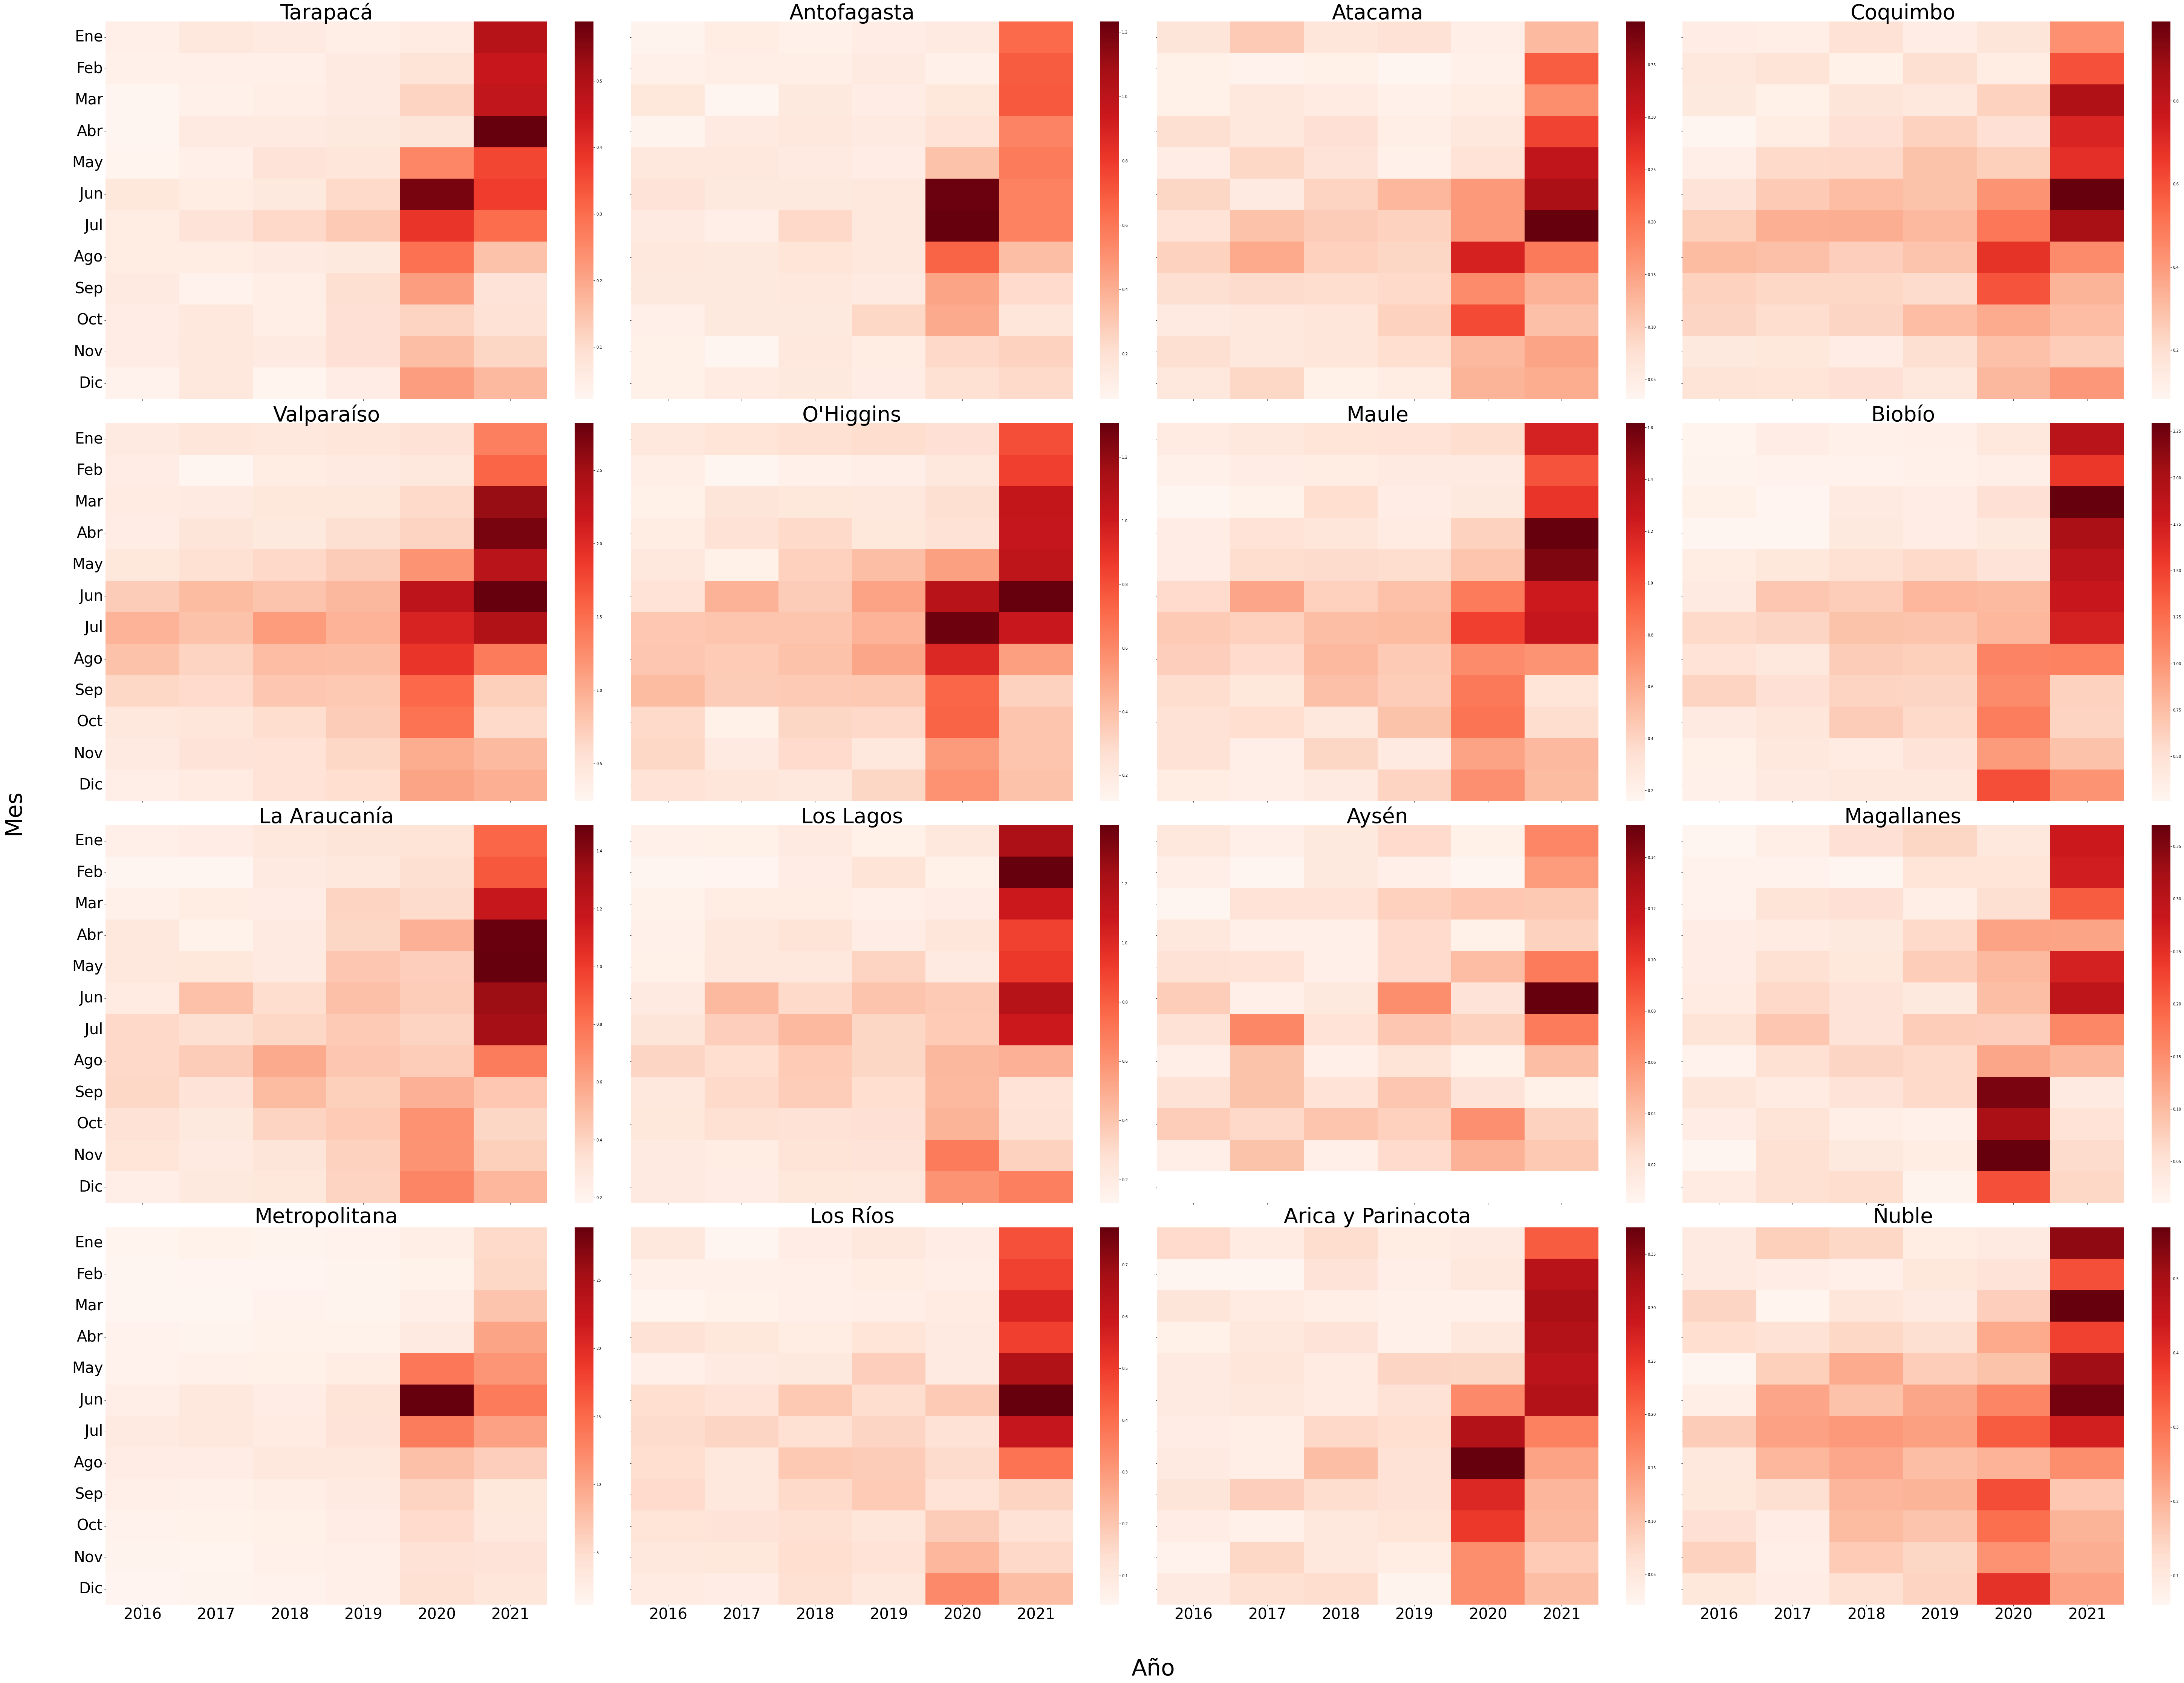

In [89]:
regiones = defunciones_mes_res_reg['region'].unique()
nregiones = len(regiones)
cols = 4
rows = int(nregiones/cols)

def plot_region(region, ax, df):
    data = (
        df[df['region'] == region]
            .drop(['region'], axis=1)
            .set_index('mes')
        )
    sns.heatmap(data, ax=ax, cmap='Reds', yticklabels=meses)
    ax.set_title(label_region[region-1], fontsize=55)
    ax.set_xlabel('',fontsize=1)
    ax.set_ylabel('',fontsize=1)
    ax.tick_params(labelsize=40,labelrotation=0)
    
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_res_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60)    
fig.tight_layout()

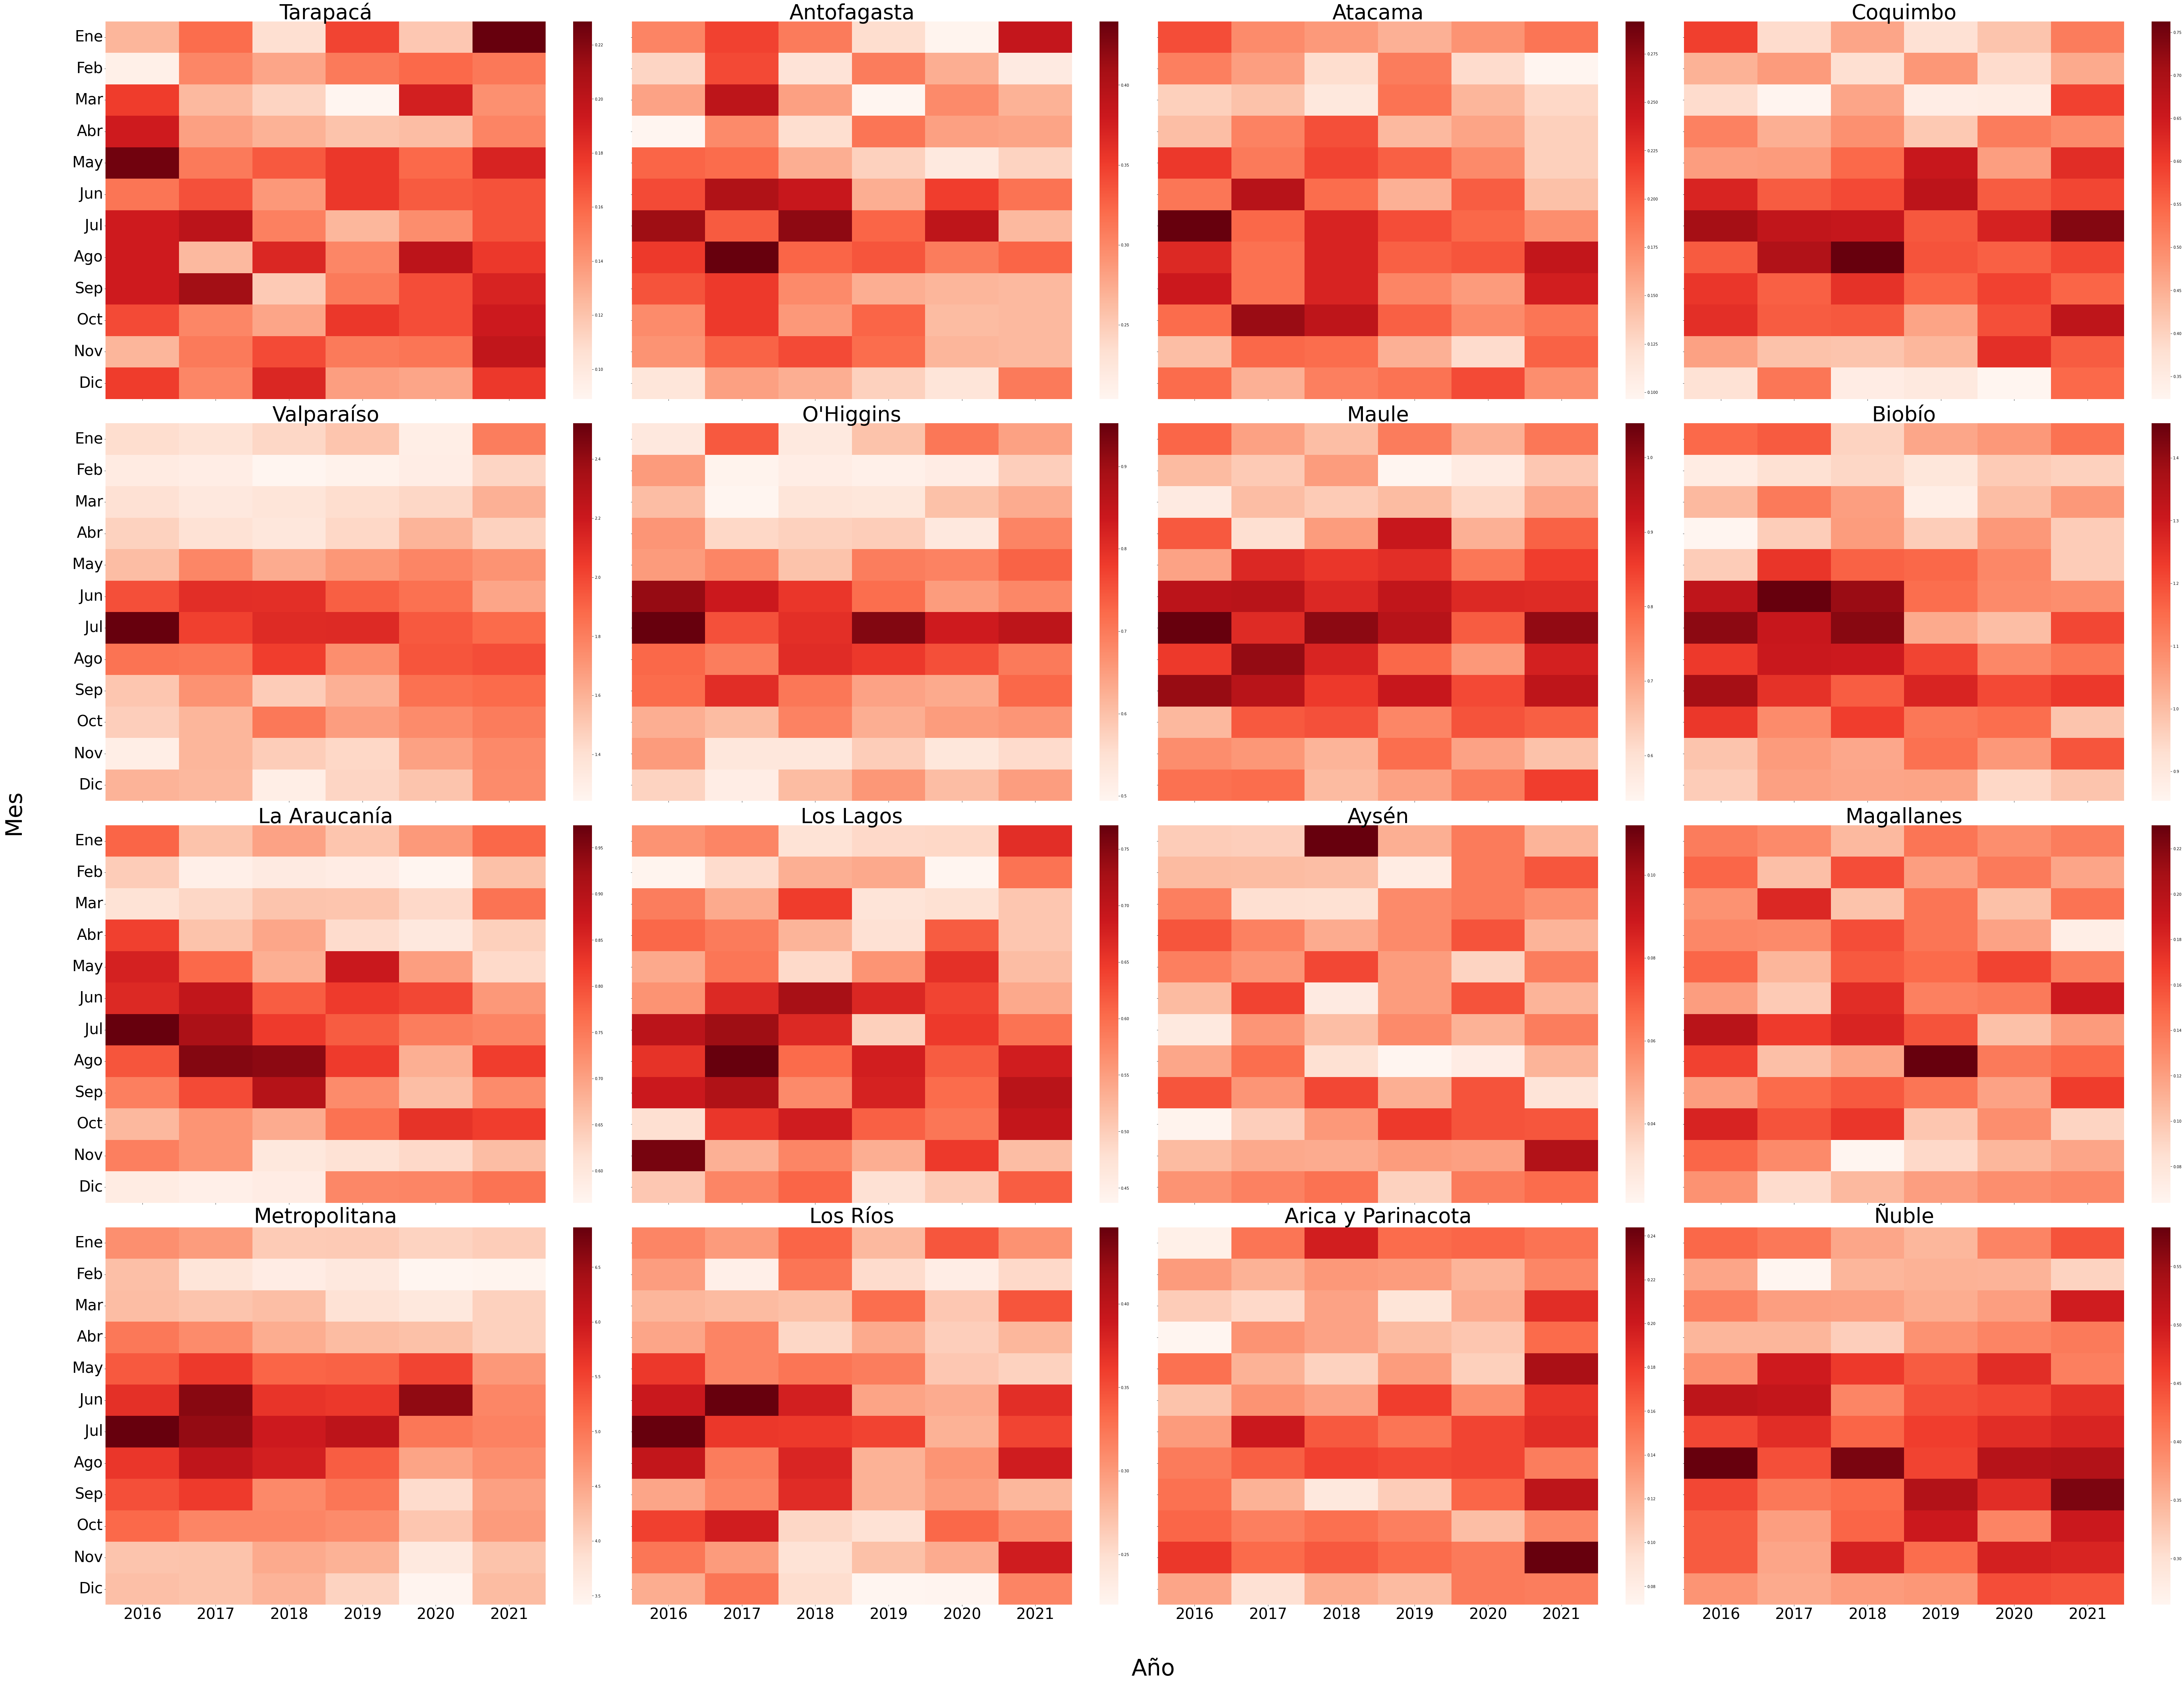

In [95]:
defunciones_mes_cir_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema circulatorio ']
defunciones_mes_cir_reg = defunciones_mes_cir_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_cir_reg = (defunciones_mes_cir_reg.groupby(by=['ANO_DEF','mes','region'])
                            .count()
                            .reset_index()
                           .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_cir_reg['tasa_def'] = defunciones_mes_cir_reg['FECHA_DEF']/defunciones_mes_cir_reg['pob']*100000
defunciones_mes_cir_reg = (defunciones_mes_cir_reg.pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum,fill_value=0))
defunciones_mes_cir_reg = defunciones_mes_cir_reg.reset_index()
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_cir_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60) 
fig.tight_layout()

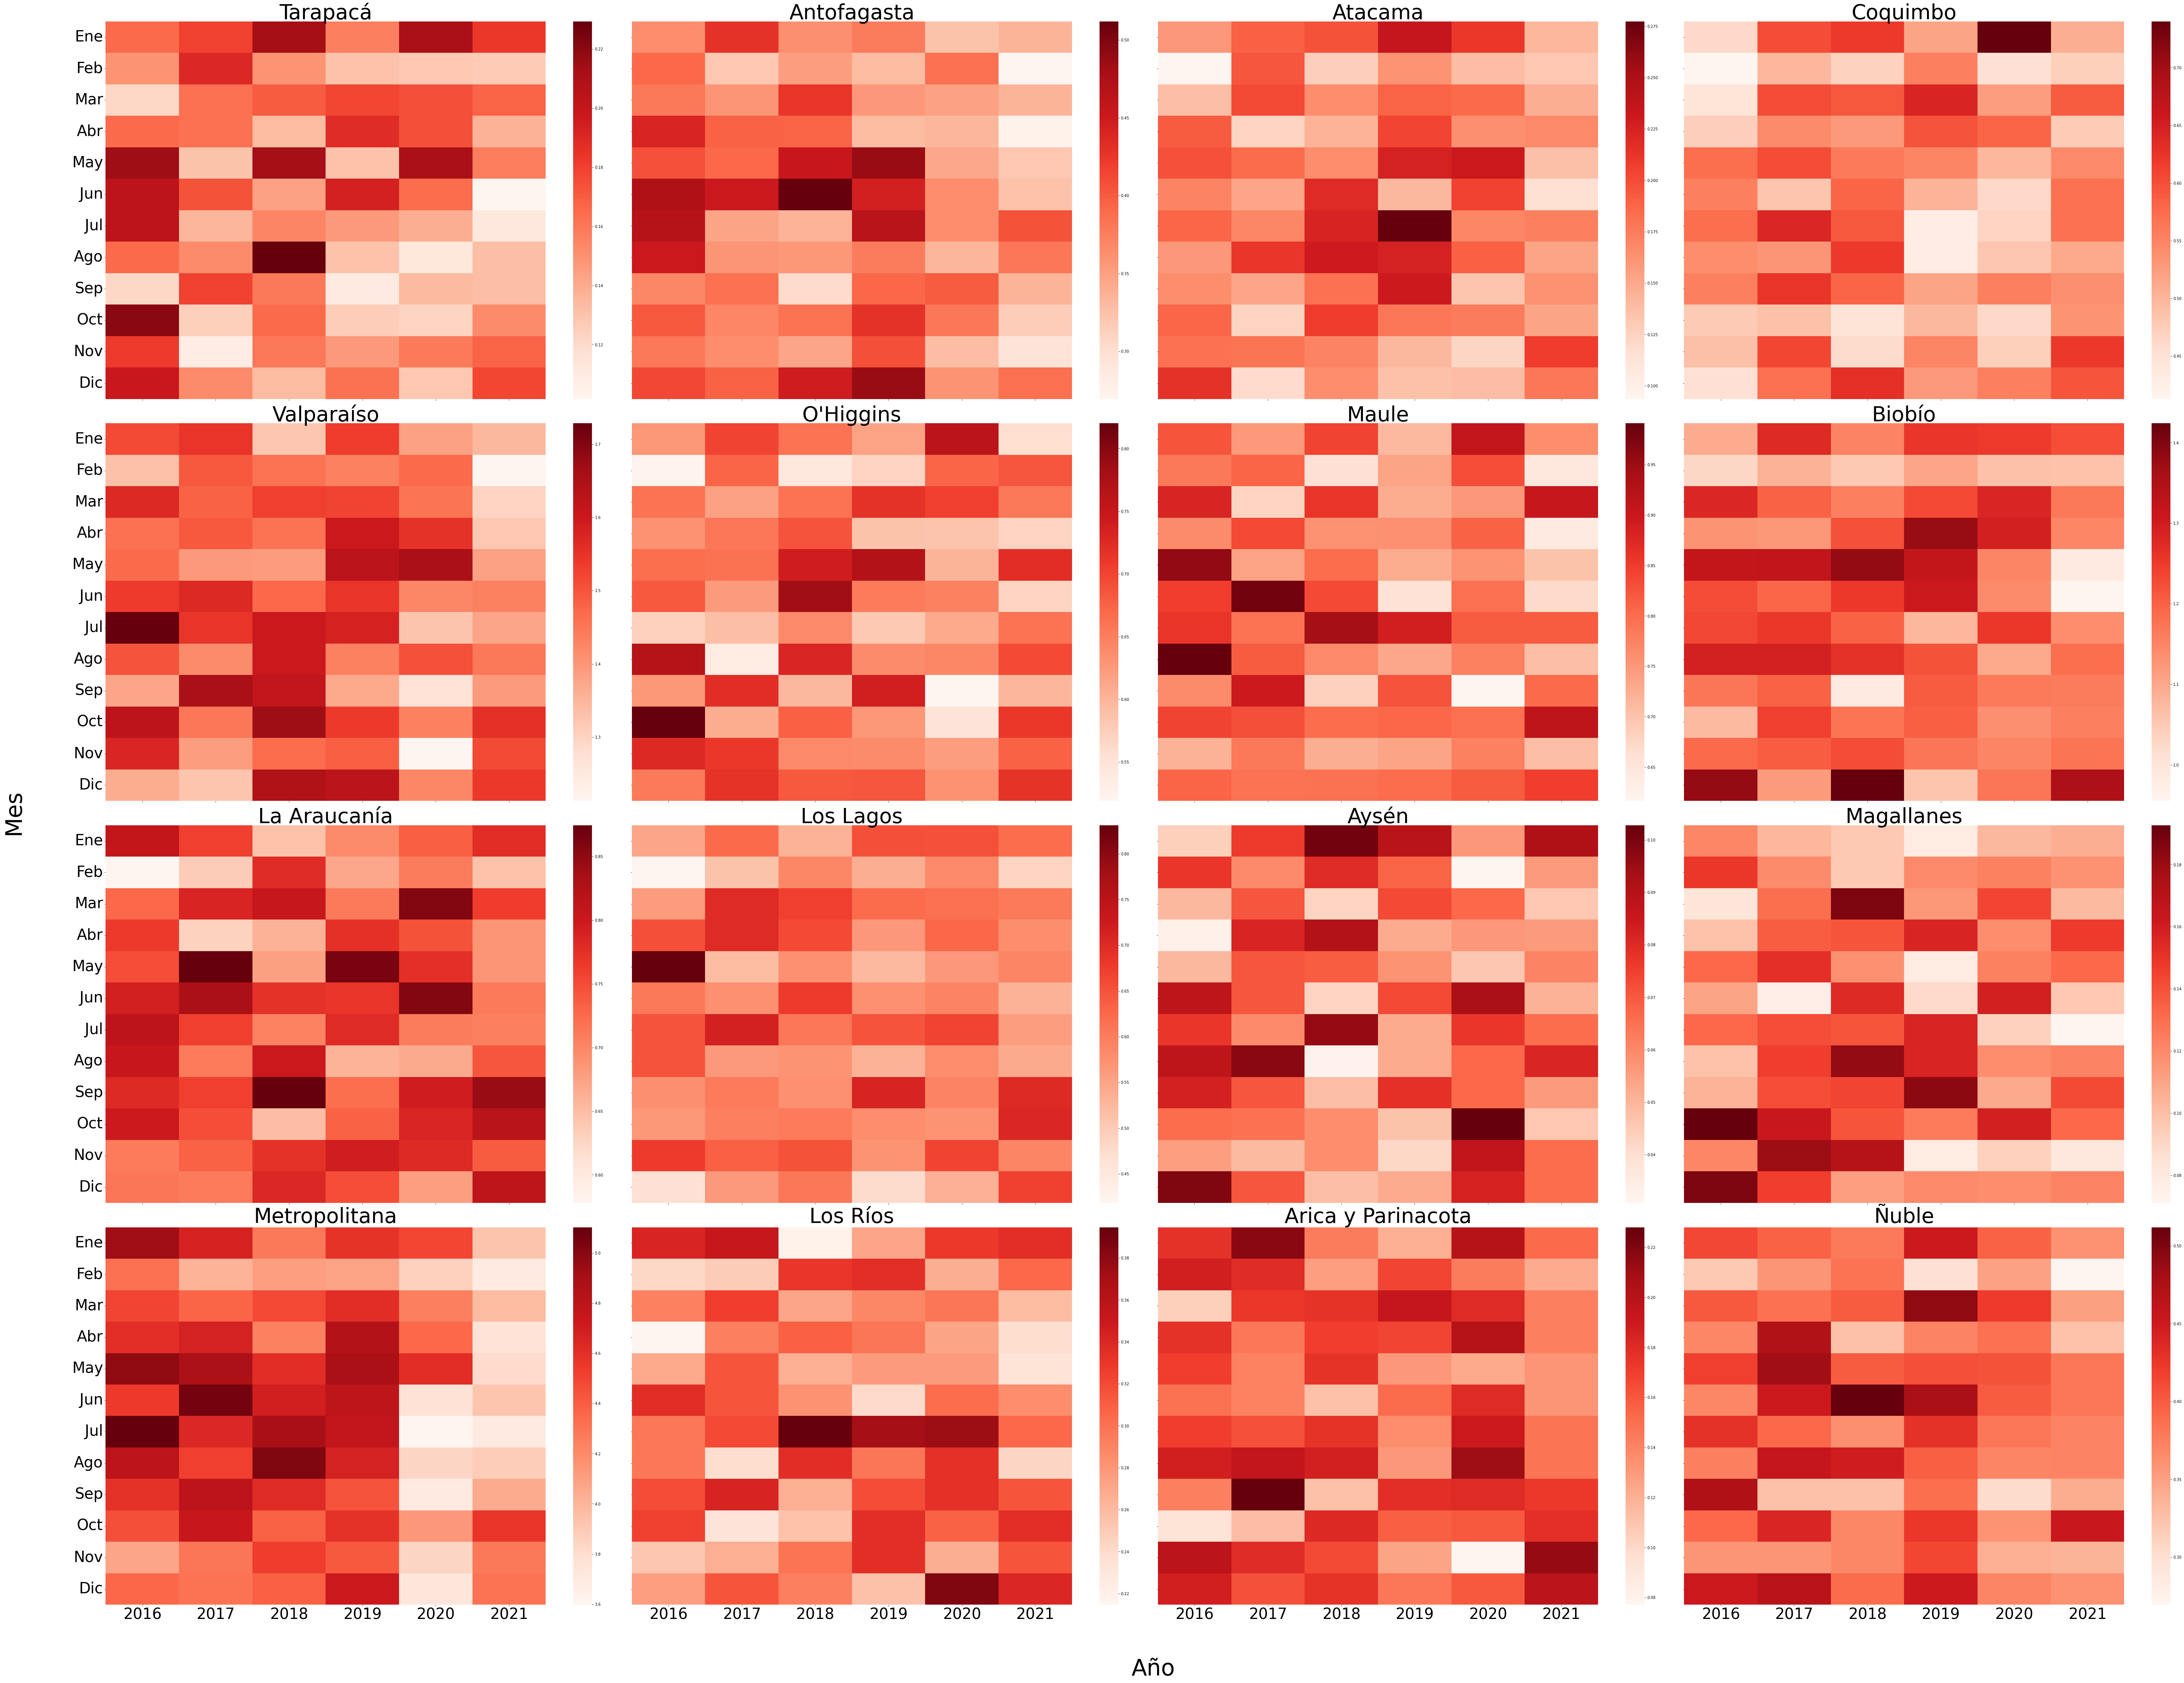

In [96]:
defunciones_mes_tum_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Tumores [Neoplasias]']
defunciones_mes_tum_reg = defunciones_mes_tum_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_tum_reg = (defunciones_mes_tum_reg.groupby(by=['ANO_DEF','mes','region'])
                            .count()
                            .reset_index()
                           .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_tum_reg['tasa_def'] = defunciones_mes_tum_reg['FECHA_DEF']/defunciones_mes_tum_reg['pob']*100000
defunciones_mes_tum_reg = (defunciones_mes_tum_reg.pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum,fill_value=0))
defunciones_mes_tum_reg = defunciones_mes_tum_reg.reset_index()
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_tum_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60) 
fig.tight_layout()

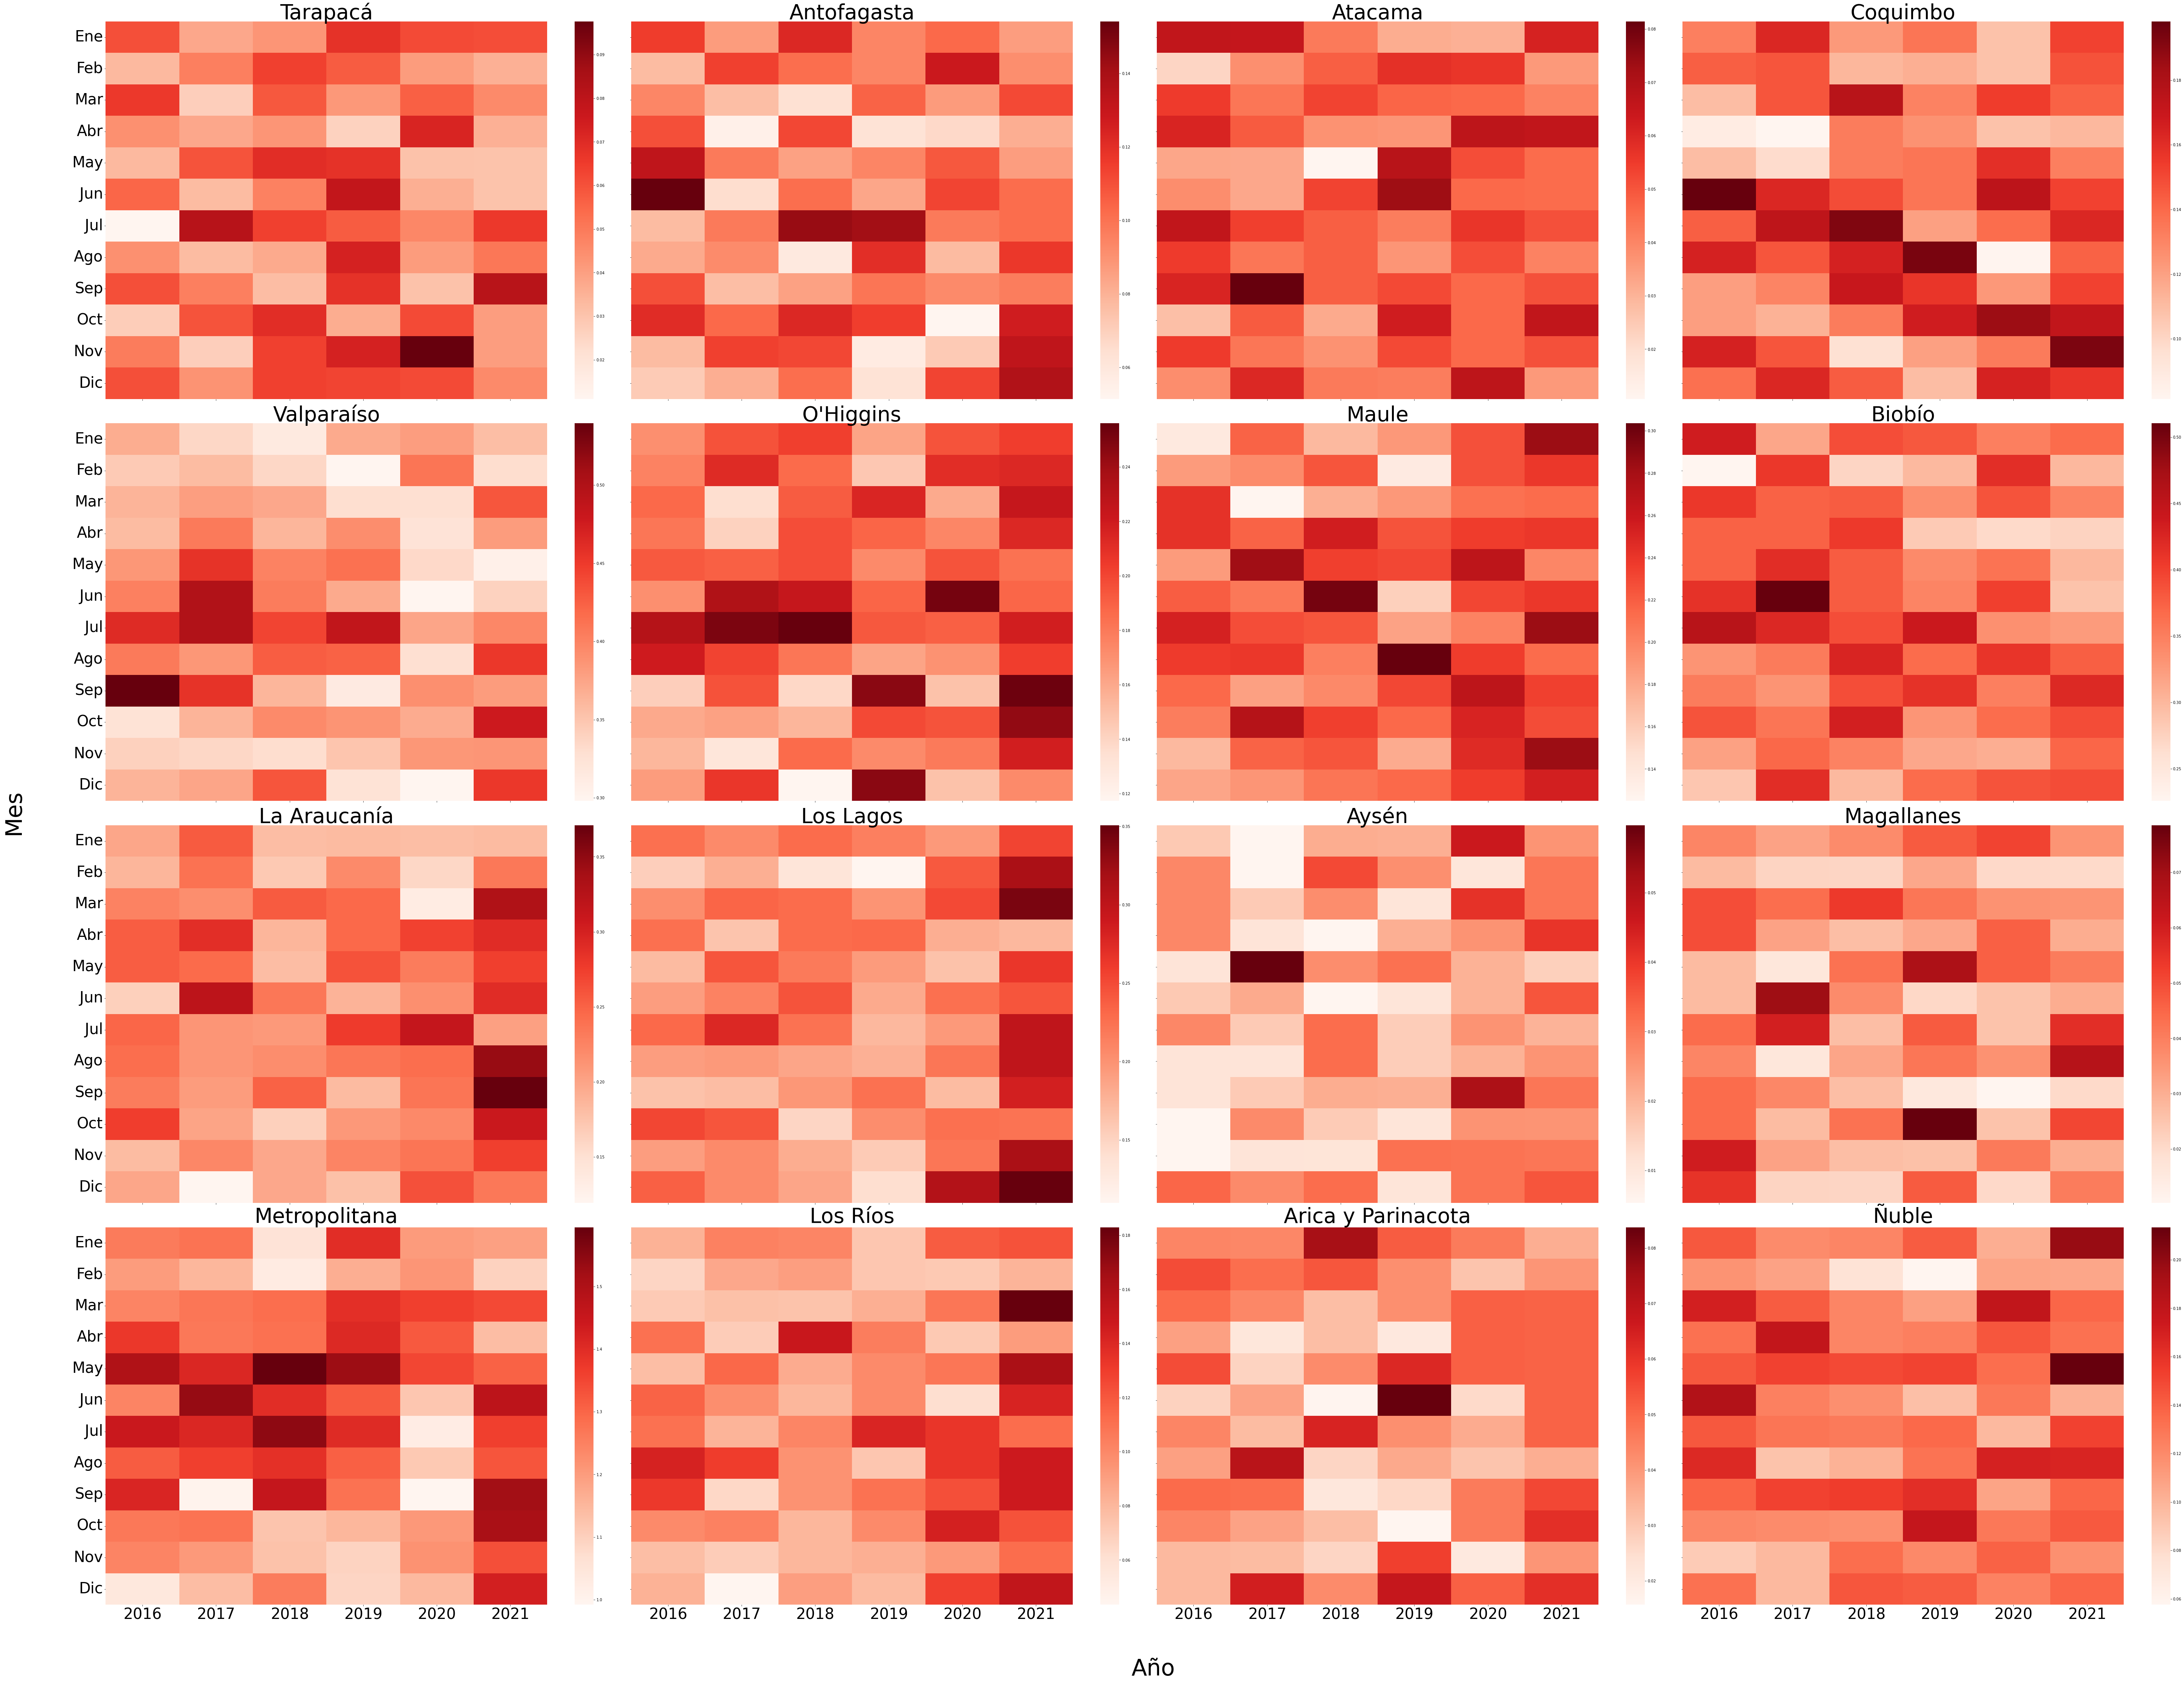

In [97]:
defunciones_mes_dig_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades del sistema digestivo']
defunciones_mes_dig_reg = defunciones_mes_dig_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_dig_reg = (defunciones_mes_dig_reg.groupby(by=['ANO_DEF','mes','region'])
                            .count()
                            .reset_index()
                           .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_dig_reg['tasa_def'] = defunciones_mes_dig_reg['FECHA_DEF']/defunciones_mes_dig_reg['pob']*100000
defunciones_mes_dig_reg = (defunciones_mes_dig_reg.pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum,fill_value=0))
defunciones_mes_dig_reg = defunciones_mes_dig_reg.reset_index()
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_dig_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60) 
fig.tight_layout()

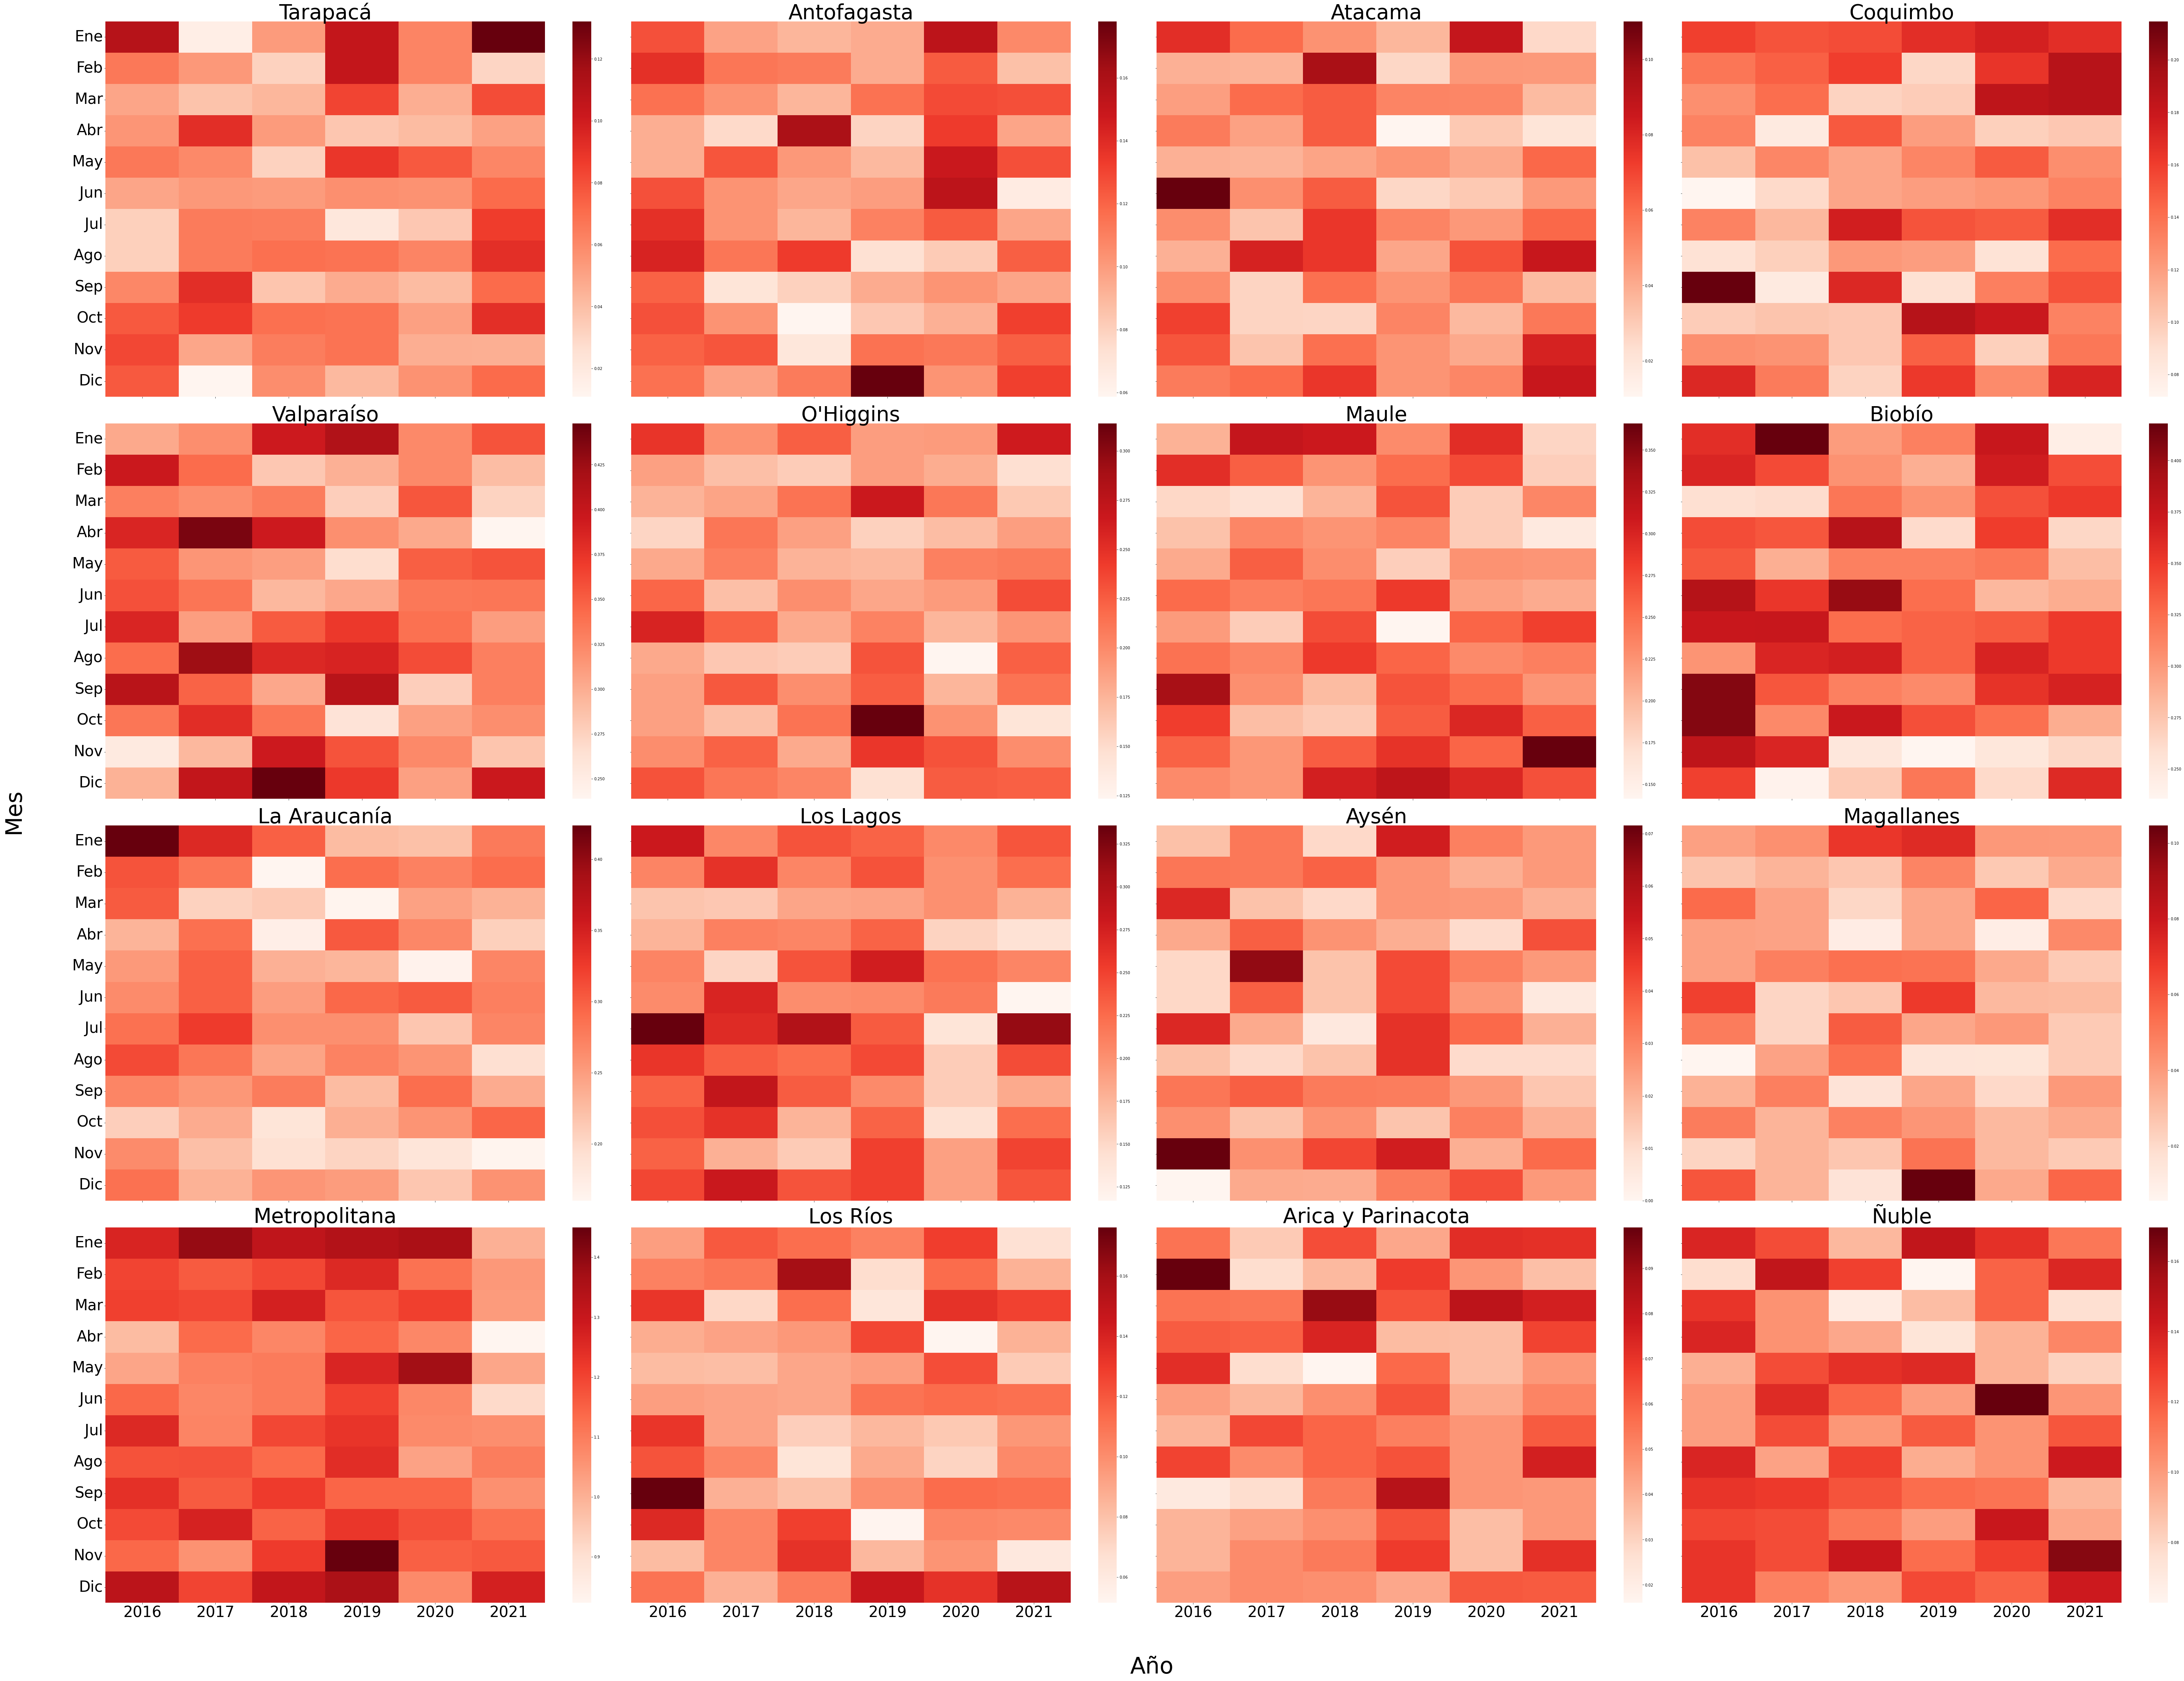

In [98]:
defunciones_mes_traum_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas']
defunciones_mes_traum_reg = defunciones_mes_traum_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_traum_reg = (defunciones_mes_traum_reg.groupby(by=['ANO_DEF','mes','region'])
                            .count()
                            .reset_index()
                           .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_traum_reg['tasa_def'] = defunciones_mes_traum_reg['FECHA_DEF']/defunciones_mes_traum_reg['pob']*100000
defunciones_mes_traum_reg = (defunciones_mes_traum_reg.pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum,fill_value=0))
defunciones_mes_traum_reg = defunciones_mes_traum_reg.reset_index()
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_traum_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60) 
fig.tight_layout()

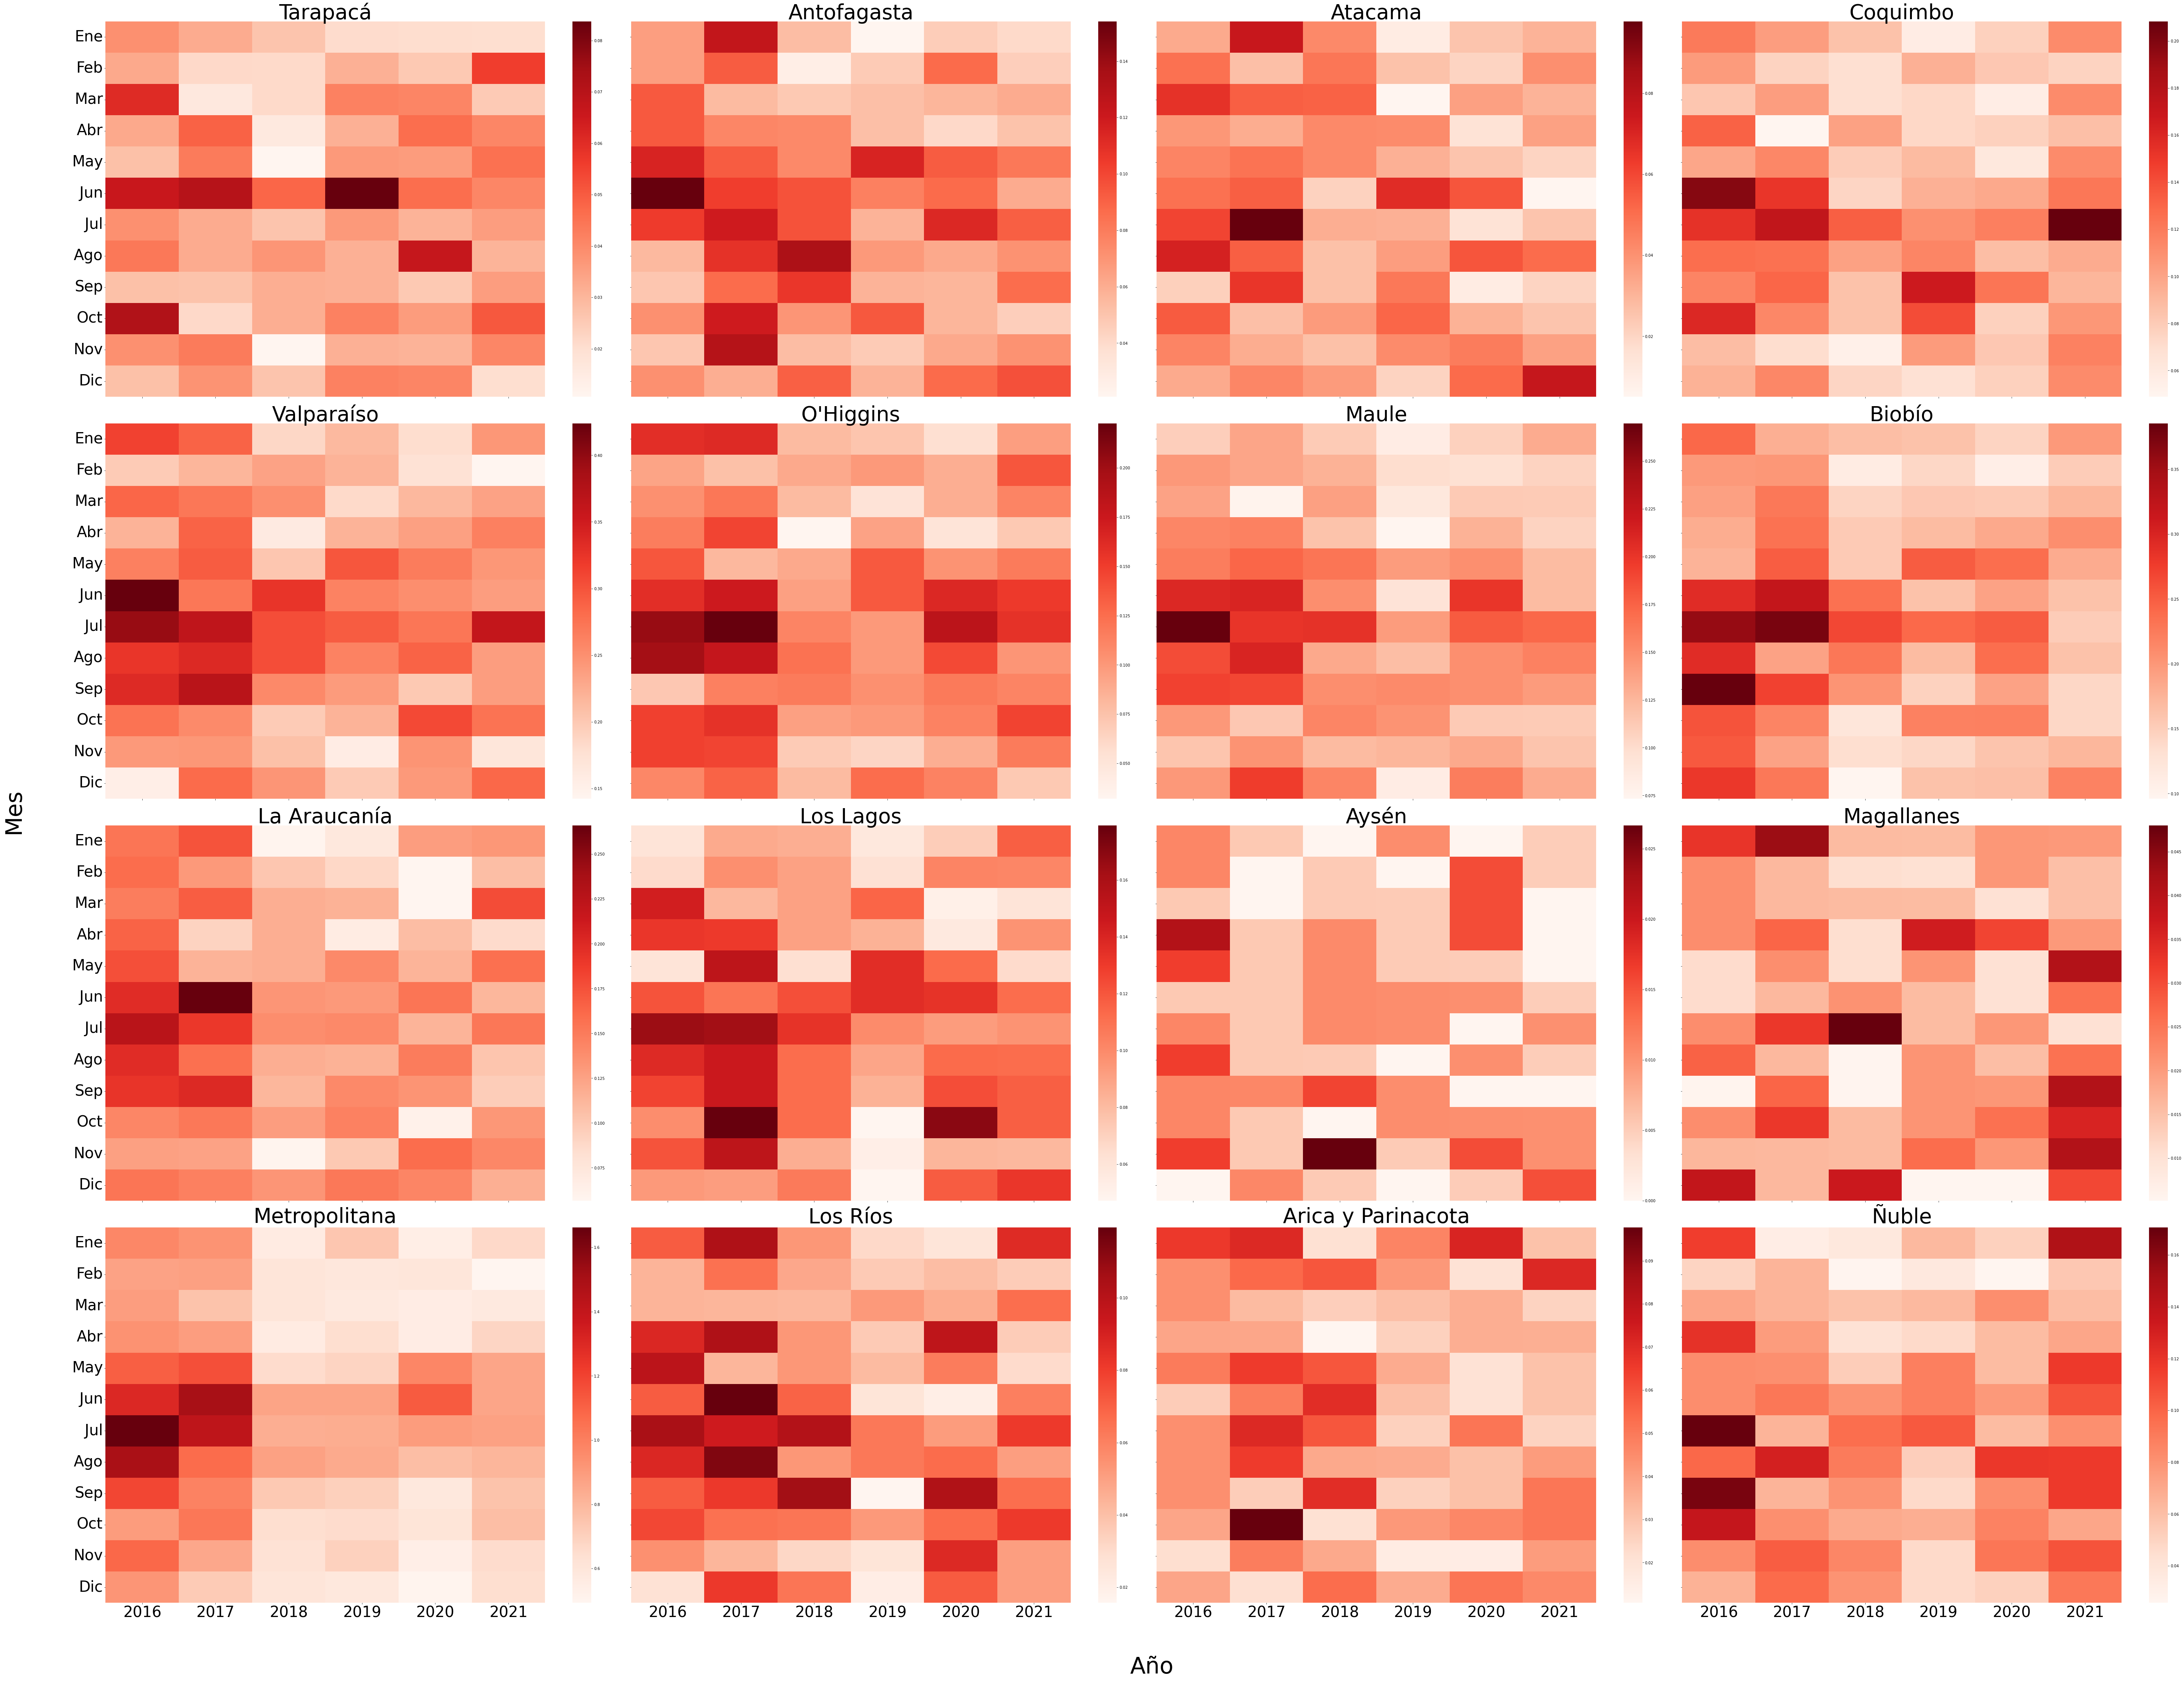

In [99]:

defunciones_mes_endoc_reg = defunciones_mes[defunciones_mes['GLOSA_CAPITULO_DIAG1']=='Enfermedades endocrinas, nutricionales y metabólicas']
defunciones_mes_endoc_reg = defunciones_mes_endoc_reg[['ANO_DEF','mes','region','FECHA_DEF']]
defunciones_mes_endoc_reg = (defunciones_mes_endoc_reg.groupby(by=['ANO_DEF','mes','region'])
                            .count()
                            .reset_index()
                           .merge(proy_pob_nac,how='left',right_on=['anio'],left_on='ANO_DEF'))
defunciones_mes_endoc_reg['tasa_def'] = defunciones_mes_endoc_reg['FECHA_DEF']/defunciones_mes_endoc_reg['pob']*100000
defunciones_mes_endoc_reg = (defunciones_mes_endoc_reg.pivot_table(values='tasa_def',index=["mes",'region'], columns = "ANO_DEF",aggfunc=sum,fill_value=0))
defunciones_mes_endoc_reg = defunciones_mes_endoc_reg.reset_index()
fig, ax = plt.subplots(rows, cols, figsize=(80,60), sharex=True,sharey=True)

for idx_region, region in enumerate(regiones):
    row = int(idx_region / cols)
    col = idx_region % cols
    plot_region(region, ax[row][col],defunciones_mes_endoc_reg)
fig.text(0.5, -0.03, 'Año', ha='center',fontsize=60)
fig.text(-0.03, 0.5, 'Mes', va='center', rotation='vertical',fontsize=60) 
fig.tight_layout()

In [ ]:
defunciones_anio_edad

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
tasa_def_com_res = tasa_def_com[tasa_def_com['causa']=='Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ']
ax.scatter(tasa_def_com_res['tasa_def_com'], tasa_def_com_res['tasa_rur'])
ax.set_xlabel('tasa_def_com')
ax.set_ylabel('tasa_rur')

fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
tasa_def_com_ce = tasa_def_com[tasa_def_com['causa']=='Traumatismos, envenenamientos y algunas otras consecuencias de causas externas']
ax.scatter(tasa_def_com_ce['tasa_def_com'], tasa_def_com_ce['tasa_rur'])
ax.set_xlabel('tasa_def_com')
ax.set_ylabel('tasa_rur')

fig.tight_layout()

In [ ]:
tasa_def_com_res['color'] = tasa_def_com_res['region'].map({
    1: '#a6cee3',
    2: '#1f78b4',
    3: '#b2df8a',
    4: '#33a02c',
    5: '#fb9a99',
    6: '#e31a1c',
    7: '#fdbf6f',
    8: '#ff7f00',
    9: '#cab2d6',
    10:'#6a3d9a',
    11:'#ffff99',
    12:'#b15928',
    13:'#8dd3c7',
    14:'#ffffb3',
    15:'#bebada',
    16:'#fb8072'
})
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(tasa_def_com_res['tasa_def_com'], tasa_def_com_res['tasa_rur'],
           c=tasa_def_com_res['color'],alpha=0.7)
ax.set_xlabel('tasa_def_com')
ax.set_ylabel('tasa_rur')

fig.tight_layout()

In [ ]:
tasa_def_com_res['color'] = tasa_def_com_res['region'].map({
    1: '#bdbdbd',
    2: '#bdbdbd',
    3: '#bdbdbd',
    4: '#bdbdbd',
    5: '#bdbdbd',
    6: '#bdbdbd',
    7: '#bdbdbd',
    8: '#bdbdbd',
    9: '#bdbdbd',
    10:'#bdbdbd',
    11:'#bdbdbd',
    12:'#bdbdbd',
    13:'#8dd3c7',
    14:'#bdbdbd',
    15:'#bdbdbd',
    16:'#bdbdbd'
})
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(tasa_def_com_res['tasa_def_com'], tasa_def_com_res['tasa_rur'],
           c=tasa_def_com_res['color'],alpha=0.7)
ax.set_xlabel('tasa_def_com')
ax.set_ylabel('tasa_rur')

fig.tight_layout()


In [ ]:
tasa_def_com_res['color'] = tasa_def_com_res['region'].map({
    1: '#bdbdbd',
    2: '#bdbdbd',
    3: '#bdbdbd',
    4: '#bdbdbd',
    5: '#bdbdbd',
    6: '#bdbdbd',
    7: '#bdbdbd',
    8: '#ff7f00',
    9: '#bdbdbd',
    10:'#bdbdbd',
    11:'#bdbdbd',
    12:'#bdbdbd',
    13:'#8dd3c7',
    14:'#bdbdbd',
    15:'#bdbdbd',
    16:'#bdbdbd'
})
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(tasa_def_com_res['tasa_def_com'], tasa_def_com_res['tasa_rur'],
           c=tasa_def_com_res['color'],alpha=0.7)
ax.set_xlabel('tasa_def_com')
ax.set_ylabel('tasa_rur')

fig.tight_layout()


In [ ]:
regiones

In [ ]:
tasa_def_com_2017_2021 = tasa_def_com[(tasa_def_com["anio"]==2017) | (tasa_def_com["anio"]==2021)]
tasa_def_com_2017_2021 = tasa_def_com_2017_2021[tasa_def_com_2017_2021['causa']=='Enfermedades del sistema respiratorio ']
tasa_def_com_2017_2021.loc[tasa_def_com_2017_2021.anio == 2017, 'anio'] ='anio_2017'
tasa_def_com_2017_2021.loc[tasa_def_com_2017_2021.anio == 2021, 'anio'] ='anio_2021'
tab3 = (tasa_def_com_2017_2021
        .pivot_table("tasa_def_com",index=["Glosa Comuna"], columns = "anio",aggfunc=sum))
tab3['delta'] = tab3["anio_2021"] / tab3["anio_2017"] - 1
tasa_rur_2021 = tasa_def_com[(tasa_def_com["anio"]==2021) & (tasa_def_com_2017_2021['causa']=='Enfermedades del sistema respiratorio ')]
tasa_rur_2021 = tasa_rur_2021[['Glosa Comuna','tasa_rur']].set_index('Glosa Comuna')
tab3 = pd.merge(tab3, tasa_rur_2021, left_index=True, right_index=True).sort_values('tasa_rur')

In [ ]:
tab3

In [ ]:

plt.figure(figsize=(100,150))

y_range = np.arange(1, len(tab3.index) + 1)
colors = np.where(tab3['anio_2021'] > tab3['anio_2017'], '#d9d9d9', '#d57883')

plt.hlines(y=y_range, xmin=tab3['anio_2017'], xmax=tab3['anio_2021'],
           color=colors, lw=20)
plt.scatter(tab3['anio_2017'], y_range, color='#0096d7', s=200, label='2017', zorder=3)
plt.scatter(tab3['anio_2021'], y_range, color='#003953', s=200 , label='2021', zorder=3)

plt.yticks(y_range, tab3.index,fontsize=40)
plt.title("prueba", loc='left',fontsize=50)
plt.xlim(0, 1450)
plt.gcf().subplots_adjust(left=0.85)
plt.tight_layout()
for (_, row), y in zip(tab3.iterrows(), y_range):
    plt.annotate(f"{row['delta']:+.0%}", (max(row["anio_2017"], row["anio_2021"]) + 4, y - 0.25))
plt.legend(ncol=1, bbox_to_anchor=(1., 0.45, 0.2, 0.2), loc='upper center', frameon=True)
plt.show()


In [ ]:
tasa_def_com_2019_2020 = tasa_def_com[(tasa_def_com["anio"]==2019) | (tasa_def_com["anio"]==2020)]
tasa_def_com_2019_2020 = tasa_def_com_2019_2020[tasa_def_com_2019_2020['causa']=='Enfermedades del sistema respiratorio ']
tasa_def_com_2019_2020.loc[tasa_def_com_2019_2020.anio == 2019, 'anio'] ='anio_2019'
tasa_def_com_2019_2020.loc[tasa_def_com_2019_2020.anio == 2020, 'anio'] ='anio_2020'
tab3 = (tasa_def_com_2019_2020
        .pivot_table("tasa_def_com",index=["Glosa Comuna"], columns = "anio",aggfunc=sum))
tab3['delta'] = tab3["anio_2020"] / tab3["anio_2019"] - 1
tasa_rur_2020 = tasa_def_com[(tasa_def_com["anio"]==2020) & (tasa_def_com_2019_2020['causa']=='Enfermedades del sistema respiratorio ')]
tasa_rur_2020 = tasa_rur_2020[['Glosa Comuna','tasa_rur']].set_index('Glosa Comuna')
tab3 = pd.merge(tab3, tasa_rur_2020, left_index=True, right_index=True).sort_values('tasa_rur')

In [ ]:

plt.figure(figsize=(100,150))

y_range = np.arange(1, len(tab3.index) + 1)
colors = np.where(tab3['anio_2020'] > tab3['anio_2019'], '#d9d9d9', '#d57883')

plt.hlines(y=y_range, xmin=tab3['anio_2019'], xmax=tab3['anio_2020'],
           color=colors, lw=20)
plt.scatter(tab3['anio_2019'], y_range, color='#0096d7', s=200, label='2019', zorder=3)
plt.scatter(tab3['anio_2020'], y_range, color='#003953', s=200 , label='2020', zorder=3)

plt.yticks(y_range, tab3.index,fontsize=40)
plt.title("prueba", loc='left',fontsize=50)
plt.xlim(0, 500)
plt.gcf().subplots_adjust(left=0.85)
plt.tight_layout()
for (_, row), y in zip(tab3.iterrows(), y_range):
    plt.annotate(f"{row['delta']:+.0%}", (max(row["anio_2019"], row["anio_2020"]) + 4, y - 0.25))
plt.legend(ncol=1,bbox_to_anchor=(1., 0.45, 0.2, 0.2), loc='upper center', frameon=True)
plt.show()
